# 1. Data Integration

In [63]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# data partition
from sklearn.model_selection import train_test_split

# data transformation
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

# Outliers
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats

# feature selection

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

import warnings
warnings.filterwarnings('ignore')

First, we import the datasets into variables.

In [64]:
train_demo = pd.read_excel('train_demo.xlsx')
train_habits = pd.read_excel('train_habits.xlsx')
train_health = pd.read_excel('train_health.xlsx')

In [ ]:
train_demo.head()

In [ ]:
train_habits.head()

In [ ]:
train_health.head()

Merging all the datasets into a unique one based on the PatientID variable.

In [65]:
train_patient_original = pd.merge(pd.merge(train_demo, train_health, on="PatientID"), train_habits, on='PatientID')

In [66]:
train_patient = train_patient_original.copy()

Defining the PatientID as the index of our dataframe.

In [67]:
train_patient.set_index('PatientID', inplace = True)
train_patient.head()

,Name,Birth_Year,Region,Education,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
PatientID,,,,,,,,,,,,,,,,,,
1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter


Defining the independent variables as x and the dependent variable (Disease) as y.

In [68]:
# x = train_patient.drop('Disease', axis = 1)
# y = train_patient['Disease']

Spliting our dataset into train (70%) and validation (30%).

# 2. Data Exploration

## 2. Superficial Analysis

In [69]:
train_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Height            800 non-null    int64 
 6   Weight            800 non-null    int64 
 7   High_Cholesterol  800 non-null    int64 
 8   Blood_Pressure    800 non-null    int64 
 9   Mental_Health     800 non-null    int64 
 10  Physical_Health   800 non-null    int64 
 11  Checkup           800 non-null    object
 12  Diabetes          800 non-null    object
 13  Smoking_Habit     800 non-null    object
 14  Drinking_Habit    800 non-null    object
 15  Exercise          800 non-null    object
 16  Fruit_Habit       800 non-null    object
 17  Water_Habit 

Checking if there are any duplicates in our dataframe.

In [70]:
train_patient.duplicated().value_counts()

False    800
dtype: int64

In [71]:
undesireable_char = ["!","$","%","?","*","+","_","@","€"," ","{"]
a = train_patient.replace(undesireable_char,np.nan, inplace=True)

In [72]:
print(a)

None


Looking for null values in the dataframe. We concluded that Education contains 13 null values.

In [73]:
train_patient.isna().sum()

Name                 0
Birth_Year           0
Region               0
Education           13
Disease              0
Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
dtype: int64

In [74]:
train_patient[train_patient["Disease"] == 0].describe(include="all")

,Name,Birth_Year,Region,Education,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
count,389,389.000000,389,384,389.0,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389,389,389,389,389,389,389
unique,388,NaN,10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,2,3,2,5,3
top,Mr. Gary Miller,NaN,East Midlands,University Complete (3 or more years),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
freq,2,NaN,78,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241,289,318,225,208,126,174
mean,NaN,1963.524422,NaN,NaN,0.0,169.205656,65.647815,253.313625,133.974293,15.033419,7.030848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,16.521543,NaN,NaN,0.0,7.339265,11.688477,47.967390,18.546941,5.301859,6.153456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1859.000000,NaN,NaN,0.0,151.000000,40.000000,135.000000,100.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1960.000000,NaN,NaN,0.0,165.000000,56.000000,220.000000,120.000000,12.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1964.000000,NaN,NaN,0.0,171.000000,64.000000,252.000000,130.000000,16.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1970.000000,NaN,NaN,0.0,174.000000,73.000000,287.000000,144.000000,19.000000,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
train_patient[train_patient["Disease"] == 1].describe(include="all")

,Name,Birth_Year,Region,Education,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
count,411,411.000000,411,403,411.0,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411,411,411,411,411,411,411
unique,411,NaN,10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,2,3,2,5,3
top,Mr. Dana Morse,NaN,East Midlands,University Complete (3 or more years),NaN,NaN,NaN,NaN,NaN,NaN,NaN,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters
freq,1,NaN,76,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,324,155,355,250,355,326,190
mean,NaN,1968.428224,NaN,NaN,1.0,166.481752,69.890511,245.545012,128.289538,19.532847,2.218978,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,13.908642,NaN,NaN,0.0,8.331342,12.161121,54.545482,15.013697,4.477125,3.278270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1855.000000,NaN,NaN,1.0,151.000000,41.000000,130.000000,94.000000,5.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1963.000000,NaN,NaN,1.0,158.000000,61.000000,211.000000,120.000000,17.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1970.000000,NaN,NaN,1.0,167.000000,71.000000,238.000000,130.000000,20.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1977.000000,NaN,NaN,1.0,173.000000,79.000000,272.000000,138.000000,23.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
train_patient.groupby("Disease").mean()

,Birth_Year,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
Disease,,,,,,,
0,1963.524422,169.205656,65.647815,253.313625,133.974293,15.033419,7.030848
1,1968.428224,166.481752,69.890511,245.545012,128.289538,19.532847,2.218978


## 3. Data Preprocessing

### New Variables

Creating a gender variable based on the prefix in the Name.

In [77]:
#Create variable Gender
gender = []

for elem in train_patient['Name']:
        if "Mr." in elem:
            gender.append("M")
    
        elif "Miss" or "Mrs." in elem:
            gender.append("F")
    
gender = np.asarray(gender)

train_patient['Gender'] = gender

print(train_patient['Gender'])

PatientID
1167    F
1805    M
1557    M
1658    M
1544    M
       ..
1909    M
1386    F
1088    F
1662    M
1117    M
Name: Gender, Length: 800, dtype: object


Converting the Birth Year to Age by subtracting it to the current Year.

In [78]:
train_patient['Age'] = datetime.now().year -train_patient['Birth_Year'] 
print(train_patient['Age'])

PatientID
1167     57
1805     53
1557     48
1658     64
1544     54
       ... 
1909     50
1386     42
1088    162
1662     47
1117     43
Name: Age, Length: 800, dtype: int64


Creating a variable of Body Mass Index using the Weight and Height variables.

In [79]:
#Create variable BMI     
train_patient['BMI'] = (train_patient['Weight']/(train_patient['Height']**2)*10000).round(2)

print(train_patient['BMI'])

PatientID
1167    27.89
1805    29.40
1557    25.91
1658    20.37
1544    17.90
        ...  
1909    19.25
1386    24.75
1088    17.21
1662    27.55
1117    23.39
Name: BMI, Length: 800, dtype: float64


In [80]:
train_patient_model = train_patient.copy()

# 3.x Coherence checking

In [81]:
train_patient.drop(train_patient[train_patient["Age"]> 100].index, inplace = True)

### Categorical Variables Exploration

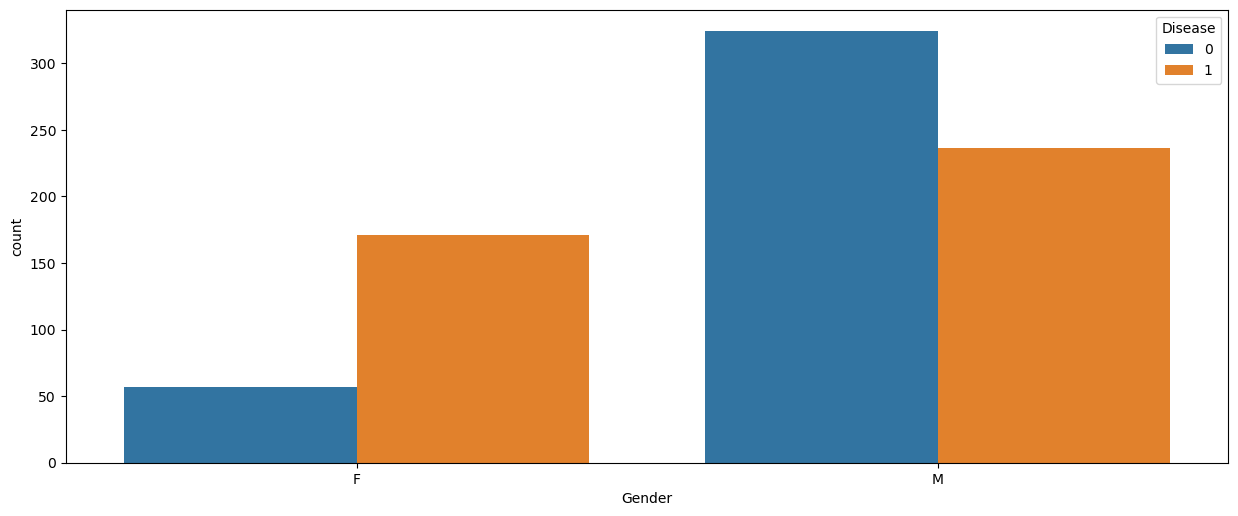

In [82]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = 'Gender', hue = "Disease", data = train_patient)
plt.show()

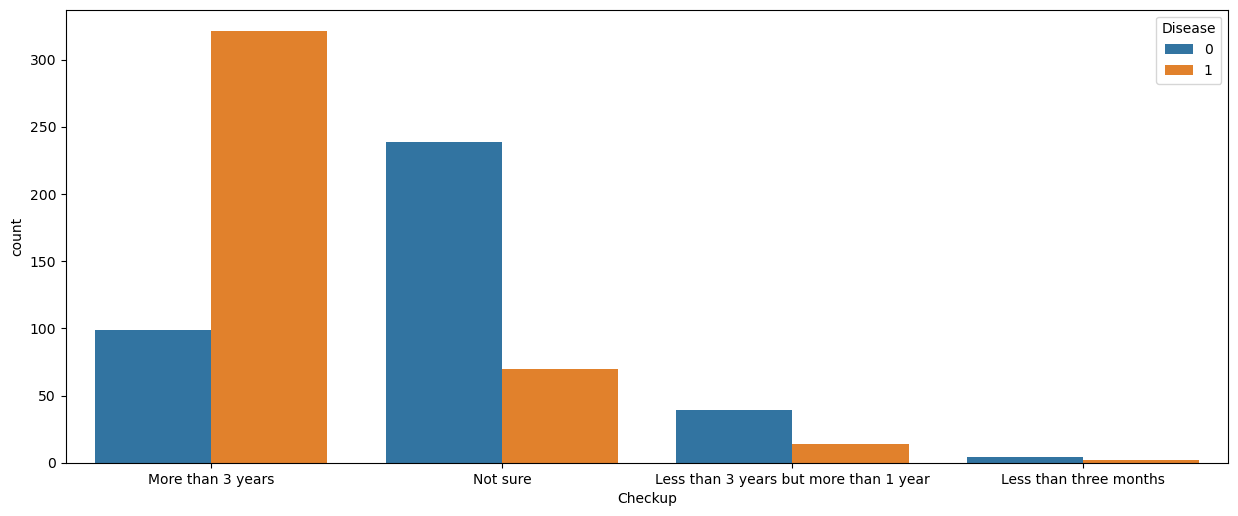

In [83]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = 'Checkup', hue = "Disease", data = train_patient)
plt.show()

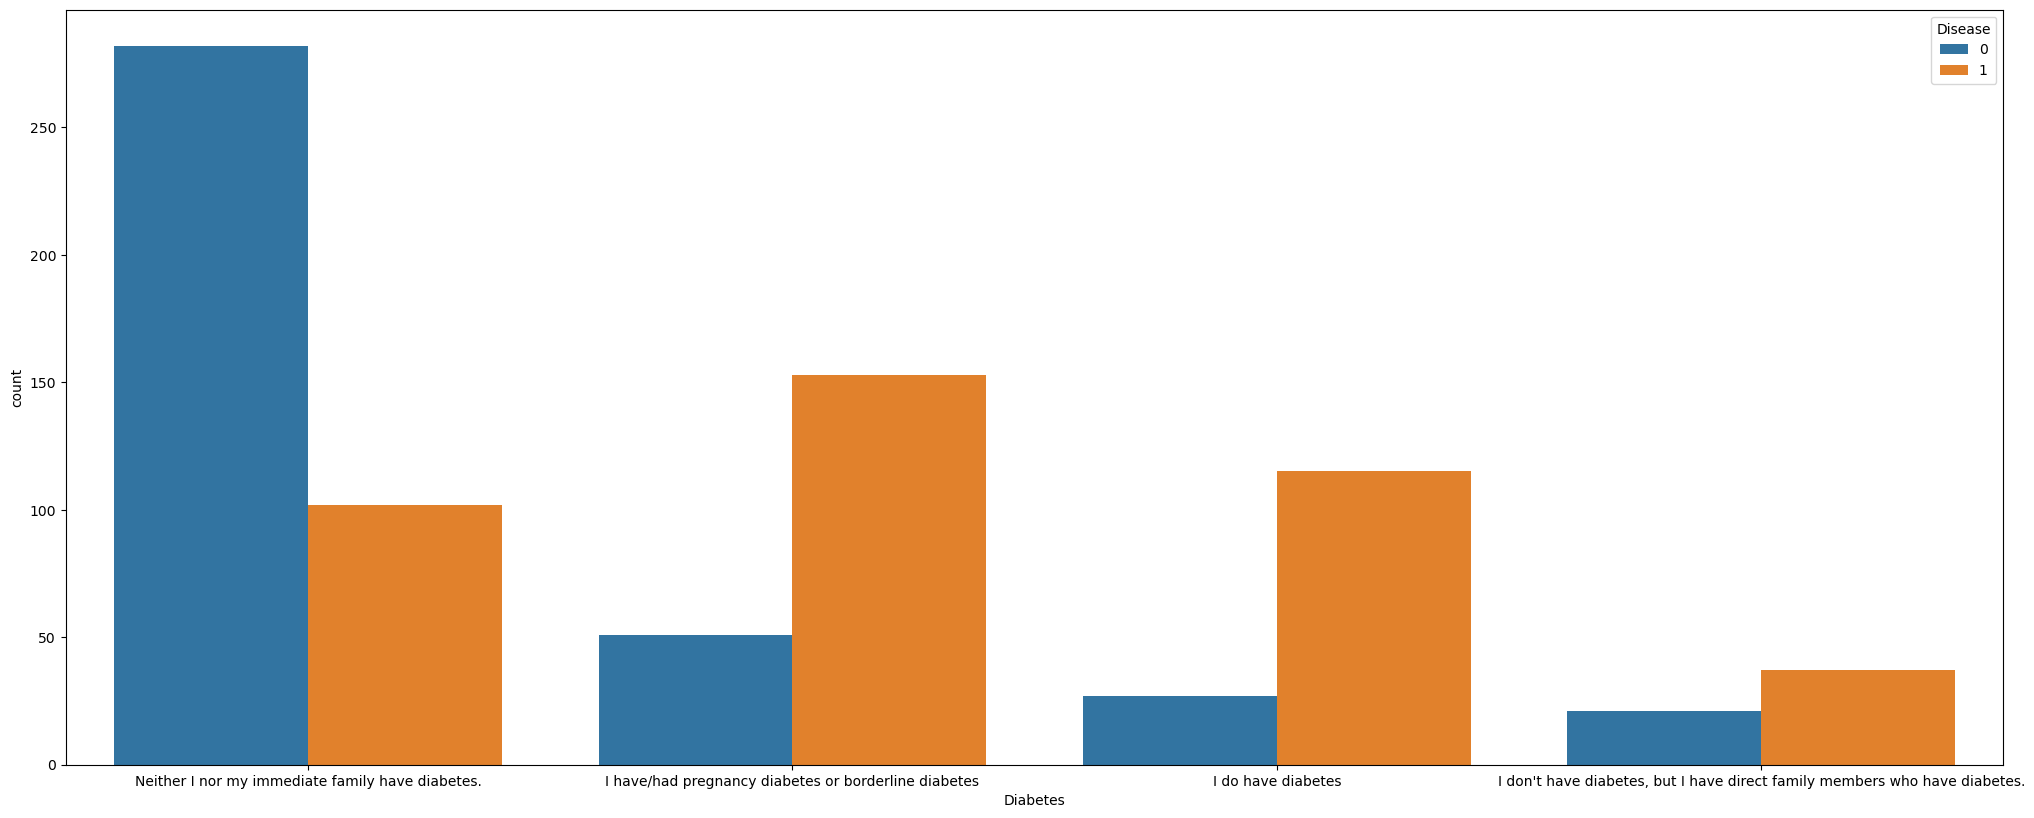

In [84]:
plt.figure(figsize=(25, 10), dpi=100)
sns.countplot(x = 'Diabetes', hue = "Disease", data = train_patient)
plt.show()

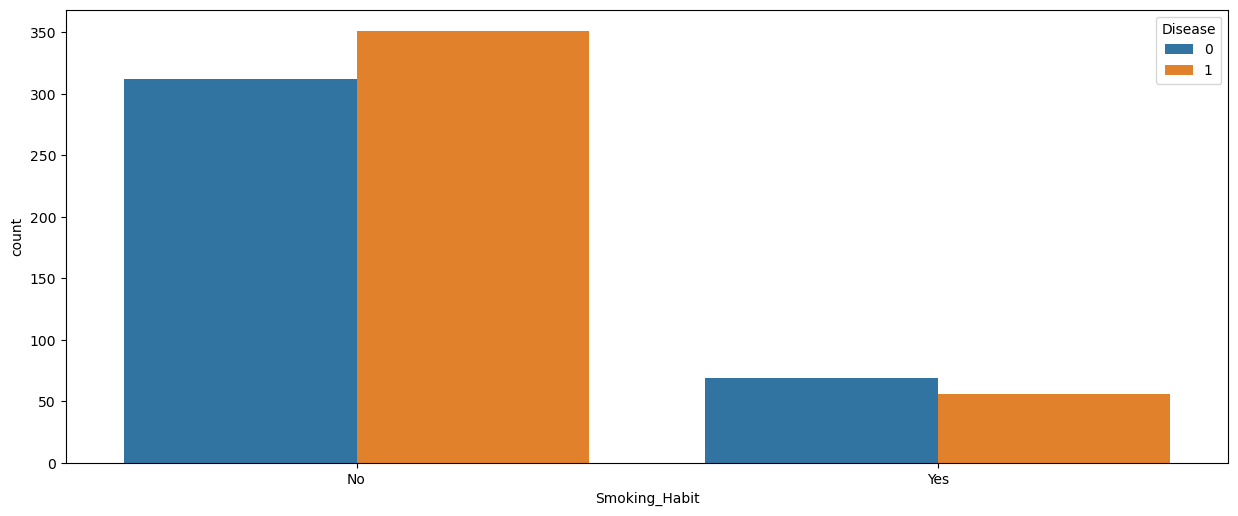

In [85]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = 'Smoking_Habit', hue = "Disease", data = train_patient)
plt.show()

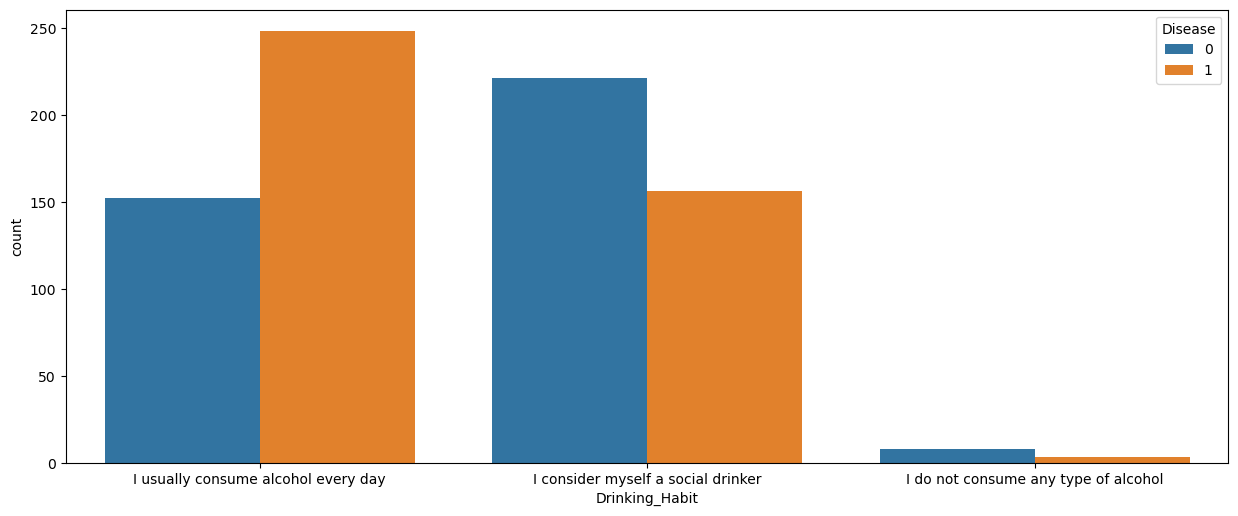

In [86]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = 'Drinking_Habit', hue = "Disease", data = train_patient)
plt.show()

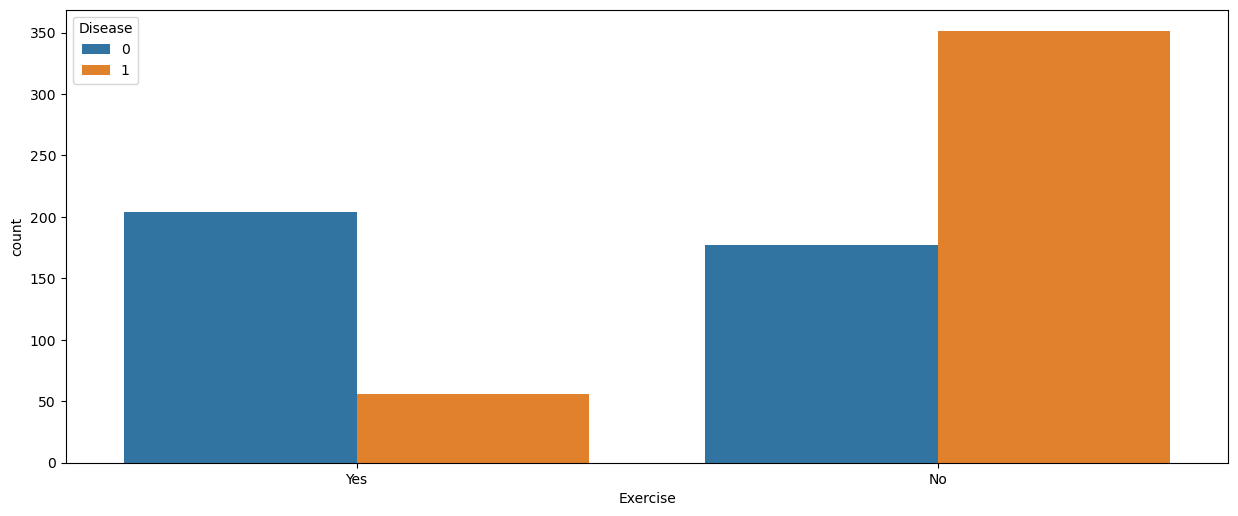

In [87]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = 'Exercise', hue = "Disease", data = train_patient)
plt.show()

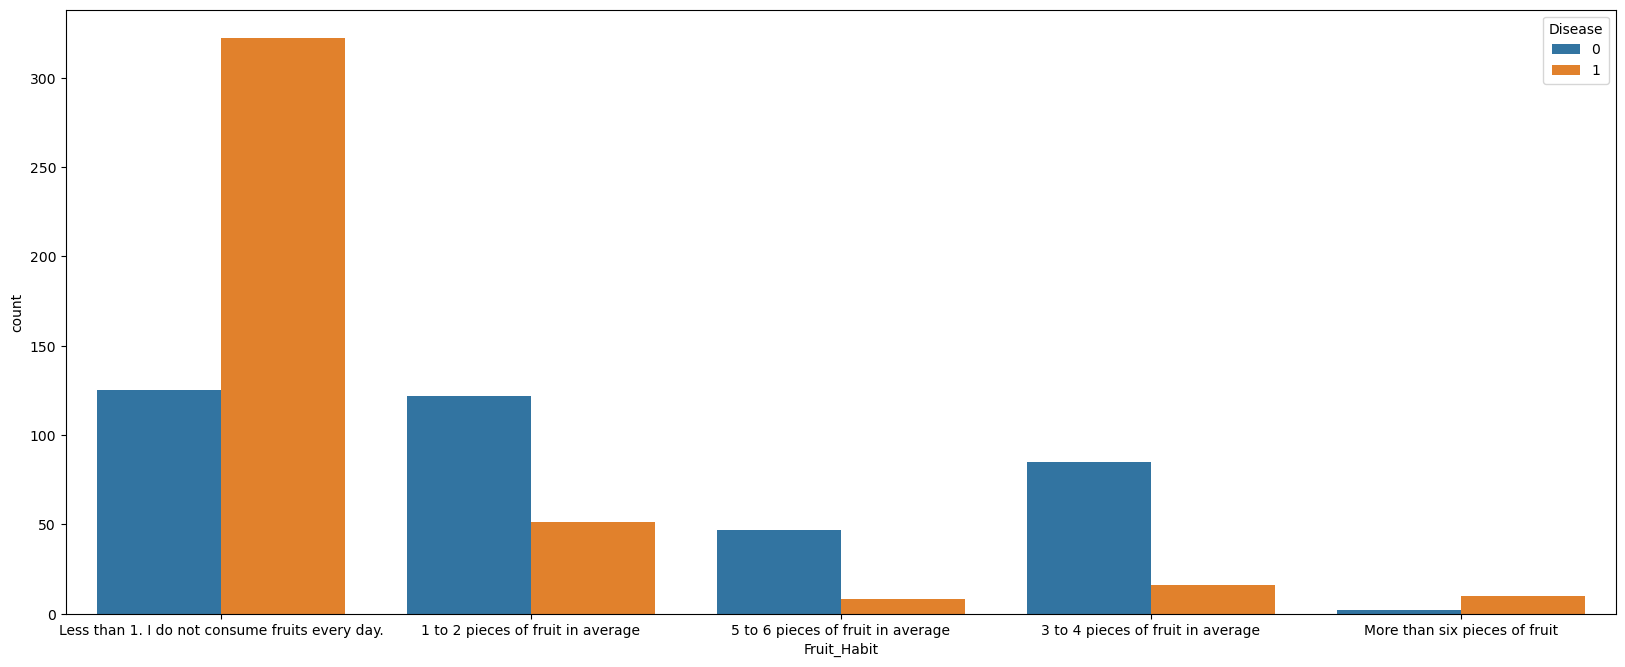

In [88]:
plt.figure(figsize=(20, 8), dpi=100)
sns.countplot(x = 'Fruit_Habit', hue = "Disease", data = train_patient)
plt.show()

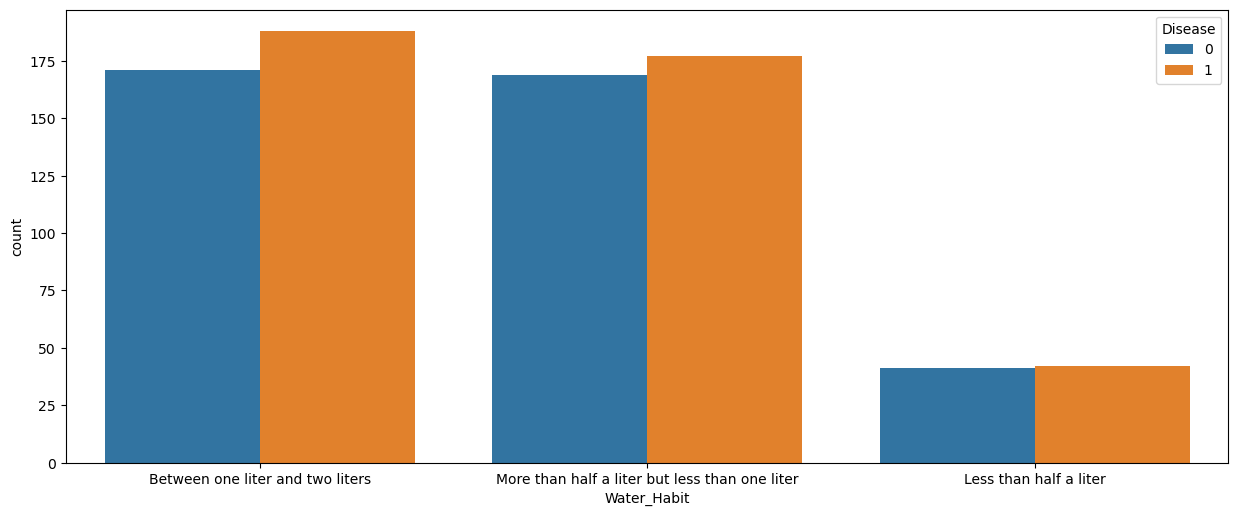

In [89]:
plt.figure(figsize=(15,6), dpi=100)
sns.countplot(x = 'Water_Habit', hue = "Disease", data = train_patient)
plt.show()

### Groups Creation and Interpretation

<Figure size 2250x2250 with 0 Axes>

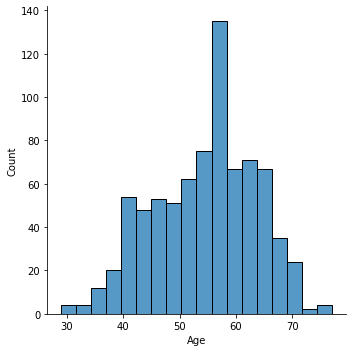

In [90]:
plt.figure(figsize=(15, 15), dpi=150)
sns.displot(train_patient, x="Age")

In [91]:
def Age_categorise(df):
    train_patient['Age_Cat'] = pd.qcut(train_patient.Age, q=4, labels = ['Young adult [29,40]','Adult1 [40,50]','Adult2 [50,60]','Senior [60,100]'])
    
Age_categorise(train_patient)
train_patient['Age_Cat'].dtype

CategoricalDtype(categories=['Young adult [29,40]', 'Adult1 [40,50]', 'Adult2 [50,60]',
                  'Senior [60,100]'],
, ordered=True)

In [92]:
train_patient.groupby("Age_Cat").mean()

,Birth_Year,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,BMI
Age_Cat,,,,,,,,,,
"Young adult [29,40]",1979.518868,0.683962,168.382075,70.452830,233.443396,123.834906,20.202830,2.900943,42.481132,24.769340
"Adult1 [40,50]",1969.207921,0.589109,167.970297,67.767327,252.732673,130.089109,17.495050,4.599010,52.792079,23.981683
"Adult2 [50,60]",1963.391753,0.298969,168.170103,67.979381,248.072165,136.020619,16.716495,5.262887,58.608247,24.000722
"Senior [60,100]",1956.255556,0.472222,166.838889,65.100000,261.894444,135.677778,14.383333,5.505556,65.744444,23.373278


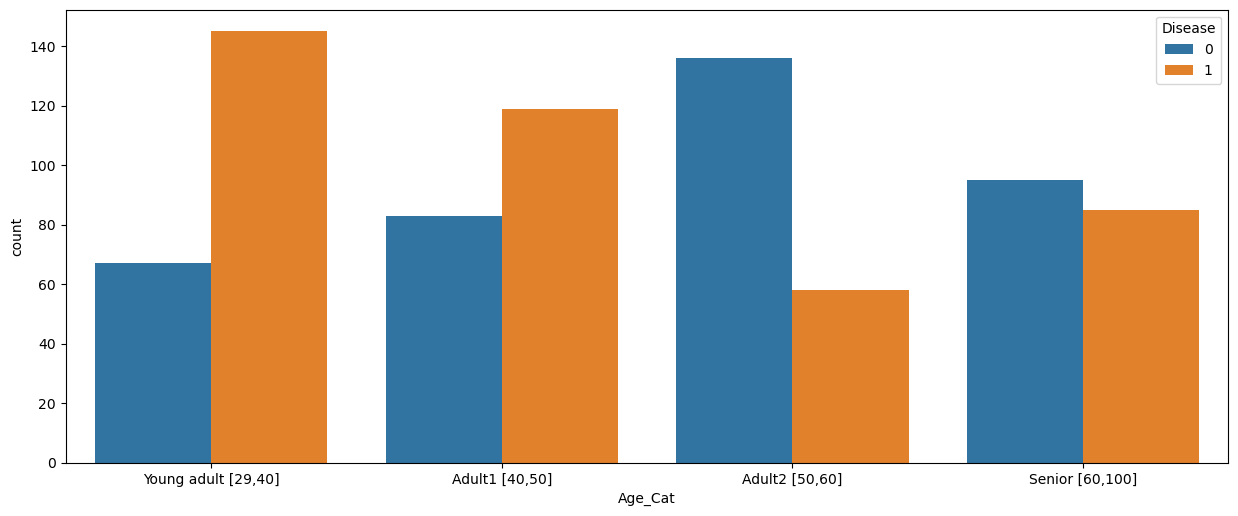

In [93]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Age_Cat", hue = "Disease", data = train_patient)
plt.show()

In [94]:
Age_Cat_counts = pd.DataFrame(train_patient['Age_Cat'].value_counts())
Age_Cat_counts['%'] = (train_patient["Age_Cat"].value_counts()/len(train_patient["Age_Cat"])*100).round(2)
Age_Cat_counts

,Age_Cat,%
"Young adult [29,40]",212,26.90
"Adult1 [40,50]",202,25.63
"Adult2 [50,60]",194,24.62
"Senior [60,100]",180,22.84


In [95]:
Age_Cat_Diseases_counts = pd.DataFrame(train_patient.groupby(['Age_Cat','Disease']).Age_Cat.count())
Age_Cat_Diseases_counts['%'] = (train_patient["Age_Cat"].value_counts()/len(Age_Cat_Diseases_counts["Age_Cat"])*100).round(2)
Age_Cat_Diseases_counts

Age_Cat   %
Age_Cat             Disease             
Young adult [29,40] 0             67 NaN
                    1            145 NaN
Adult1 [40,50]      0             83 NaN
                    1            119 NaN
Adult2 [50,60]      0            136 NaN
                    1             58 NaN
Senior [60,100]     0             95 NaN
                    1             85 NaN

In [96]:
def Colesterol_categorise(df):
    train_patient['Cholesterol_Cat'] = pd.cut(train_patient.High_Cholesterol, bins = [0,200,240,float("inf")], labels = ['Desirable','Borderline High','High'])
    
Colesterol_categorise(train_patient)
train_patient['Cholesterol_Cat'].dtype

CategoricalDtype(categories=['Desirable', 'Borderline High', 'High'], ordered=True)

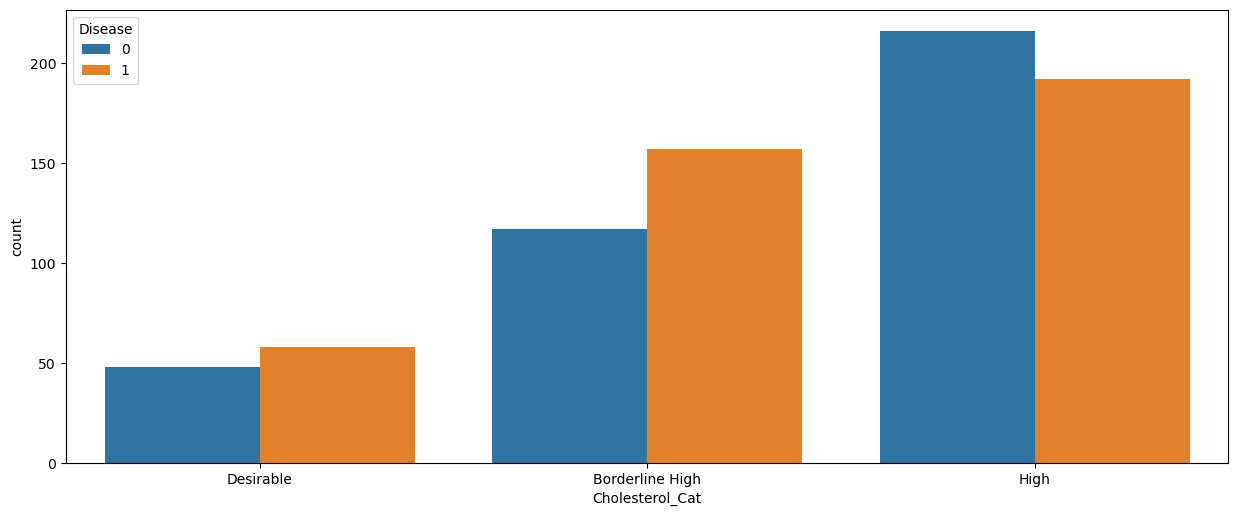

In [97]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Cholesterol_Cat", hue = "Disease", data = train_patient)
plt.show()

In [98]:
Cholesterol_Cat_counts = pd.DataFrame(train_patient['Cholesterol_Cat'].value_counts())
Cholesterol_Cat_counts['%'] = (train_patient["Cholesterol_Cat"].value_counts()/len(train_patient["Cholesterol_Cat"])*100).round(2)
Cholesterol_Cat_counts.style.set_caption("Cholesterol Categories")
Cholesterol_Cat_counts

,Cholesterol_Cat,%
High,408,51.78
Borderline High,274,34.77
Desirable,106,13.45


In [99]:
train_patient.Mental_Health.describe()

count    788.000000
mean      17.321066
std        5.405039
min        0.000000
25%       13.000000
50%       18.000000
75%       21.000000
max       29.000000
Name: Mental_Health, dtype: float64

In [100]:
def Mental_Health_categorise(df):
    train_patient['Mental_Health_Cat'] = pd.qcut(train_patient.Mental_Health, q=4, labels = ['Good','Medium','Bad','Very bad'])
    
Mental_Health_categorise(train_patient)
train_patient['Mental_Health_Cat'].dtype

CategoricalDtype(categories=['Good', 'Medium', 'Bad', 'Very bad'], ordered=True)

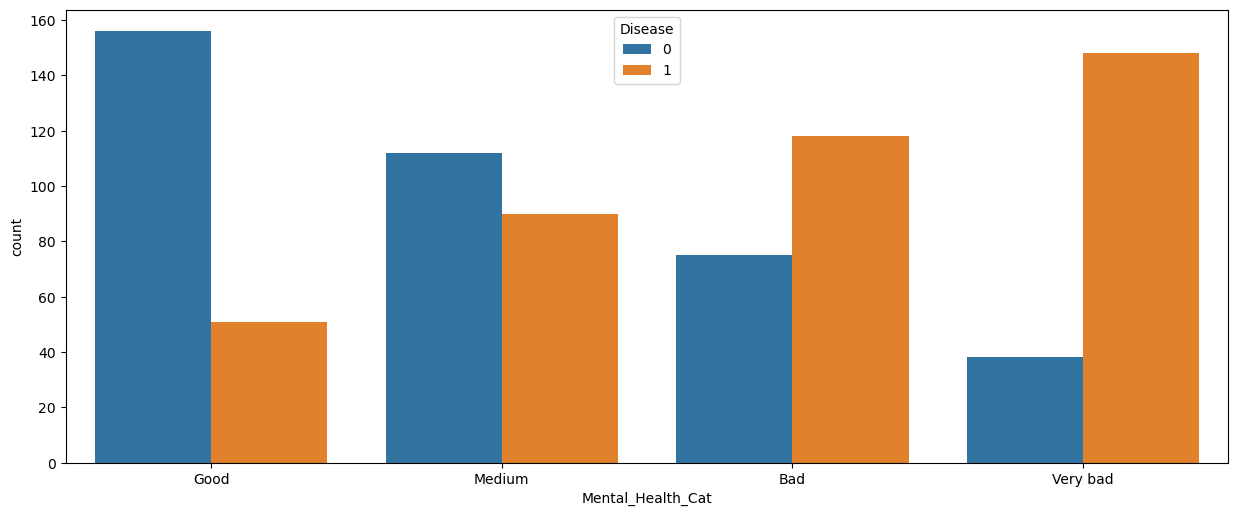

In [101]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Mental_Health_Cat", hue = "Disease", data = train_patient)
plt.show()

In [102]:
Mental_Health_Cat_counts = pd.DataFrame(train_patient['Mental_Health_Cat'].value_counts())
Mental_Health_Cat_counts['%'] = (train_patient["Mental_Health_Cat"].value_counts()/len(train_patient["Mental_Health_Cat"])*100).round(2)
Mental_Health_Cat_counts

,Mental_Health_Cat,%
Good,207,26.27
Medium,202,25.63
Bad,193,24.49
Very bad,186,23.60


In [103]:
train_patient.Physical_Health.describe()

count    788.000000
mean       4.512690
std        5.373339
min        0.000000
25%        0.000000
50%        3.000000
75%        7.000000
max       30.000000
Name: Physical_Health, dtype: float64

<Figure size 2250x2250 with 0 Axes>

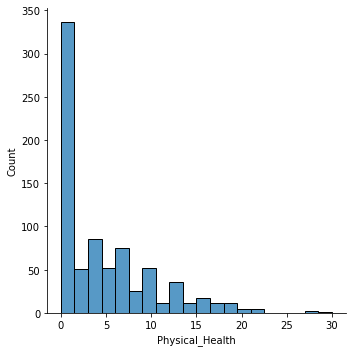

In [104]:
plt.figure(figsize=(15, 15), dpi=150)
sns.displot(train_patient, x="Physical_Health")

In [105]:
def Physical_Health_categorise(df):
    train_patient['Physical_Health_Cat'] = pd.cut(train_patient.Physical_Health, bins = [0,10,20,30], labels = ['Good','Medium','Bad'])
                                                                                                               
Physical_Health_categorise(train_patient)
train_patient['Physical_Health_Cat'].dtype

CategoricalDtype(categories=['Good', 'Medium', 'Bad'], ordered=True)

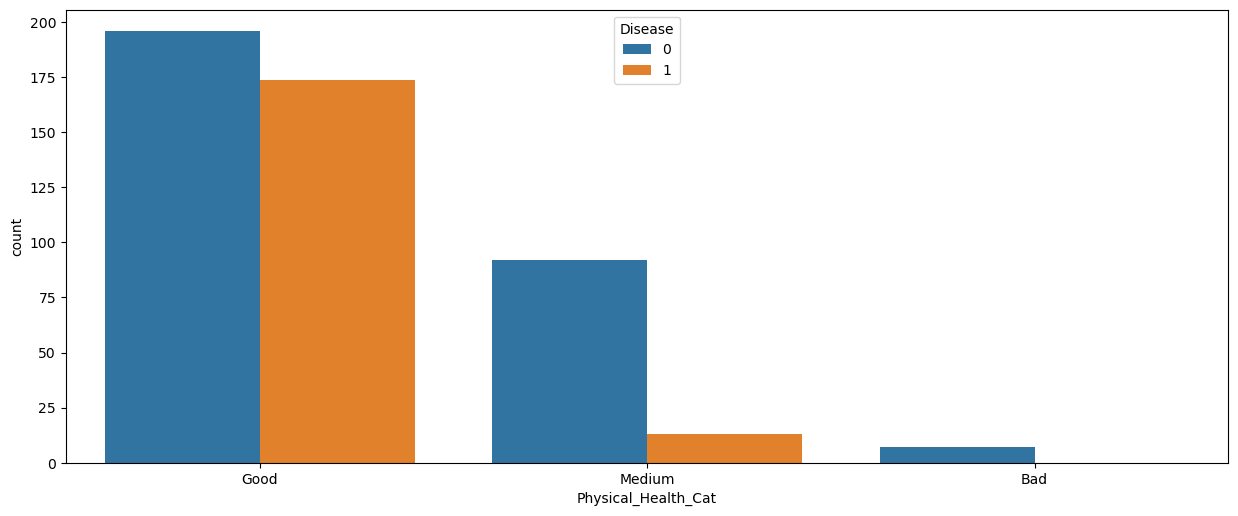

In [106]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Physical_Health_Cat", hue = "Disease", data = train_patient)
plt.show()

In [107]:
Physical_Health_Cat_counts = pd.DataFrame(train_patient['Physical_Health_Cat'].value_counts())
Physical_Health_Cat_counts['%'] = (train_patient["Physical_Health_Cat"].value_counts()/len(train_patient["Physical_Health_Cat"])*100).round(2)
Physical_Health_Cat_counts

,Physical_Health_Cat,%
Good,370,46.95
Medium,105,13.32
Bad,7,0.89


In [108]:
train_patient.BMI.describe()

count    788.000000
mean      24.059302
std        3.651810
min       16.980000
25%       20.860000
50%       24.385000
75%       27.145000
max       30.120000
Name: BMI, dtype: float64

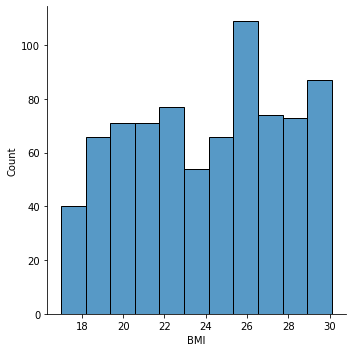

In [109]:
sns.displot(train_patient, x="BMI")

In [110]:
def BMI_categorise(df):
     train_patient['BMI_Cat'] = pd.cut(train_patient.BMI, bins = [0,18.5,25,30,float("inf")], labels = ['Underweight','Healthy','Overweight','Obesity'])
                                                                                                               
BMI_categorise(train_patient)
train_patient['BMI_Cat'].dtype

CategoricalDtype(categories=['Underweight', 'Healthy', 'Overweight', 'Obesity'], ordered=True)

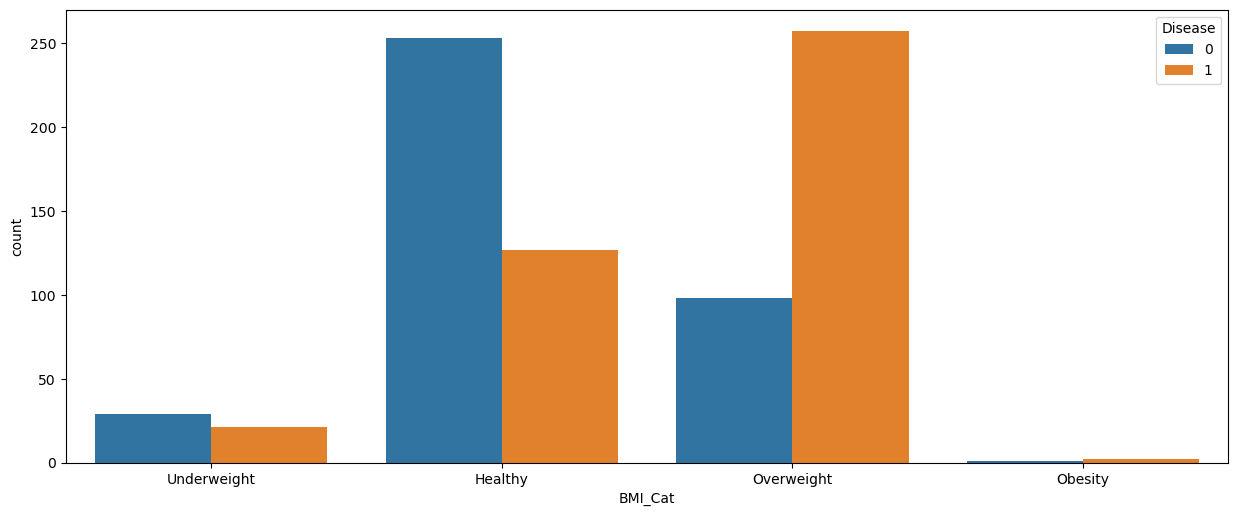

In [111]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "BMI_Cat", hue = "Disease", data = train_patient)
plt.show()

In [112]:
BMI_Cat_counts = pd.DataFrame(train_patient['BMI_Cat'].value_counts())
BMI_Cat_counts['%'] = (train_patient["BMI_Cat"].value_counts()/len(train_patient["BMI_Cat"])*100).round(2)
BMI_Cat_counts

,BMI_Cat,%
Healthy,380,48.22
Overweight,355,45.05
Underweight,50,6.35
Obesity,3,0.38


In [113]:
train_patient.Blood_Pressure.describe()

count    788.000000
mean     131.143401
std       17.075243
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: Blood_Pressure, dtype: float64

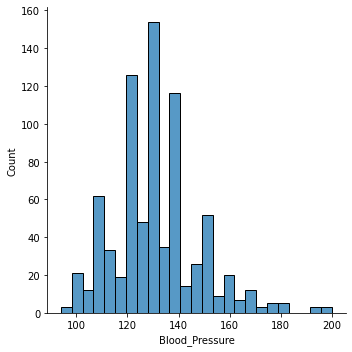

In [114]:
sns.displot(train_patient, x="Blood_Pressure")

In [115]:
def Blood_Pressure_categorise(df):
    train_patient['Blood_Pressure_Cat'] = pd.qcut(train_patient.Blood_Pressure, q=4, labels = ['Low',"Regular","High","Very High"])
    
Blood_Pressure_categorise(train_patient)
train_patient['Blood_Pressure_Cat'].dtype

CategoricalDtype(categories=['Low', 'Regular', 'High', 'Very High'], ordered=True)

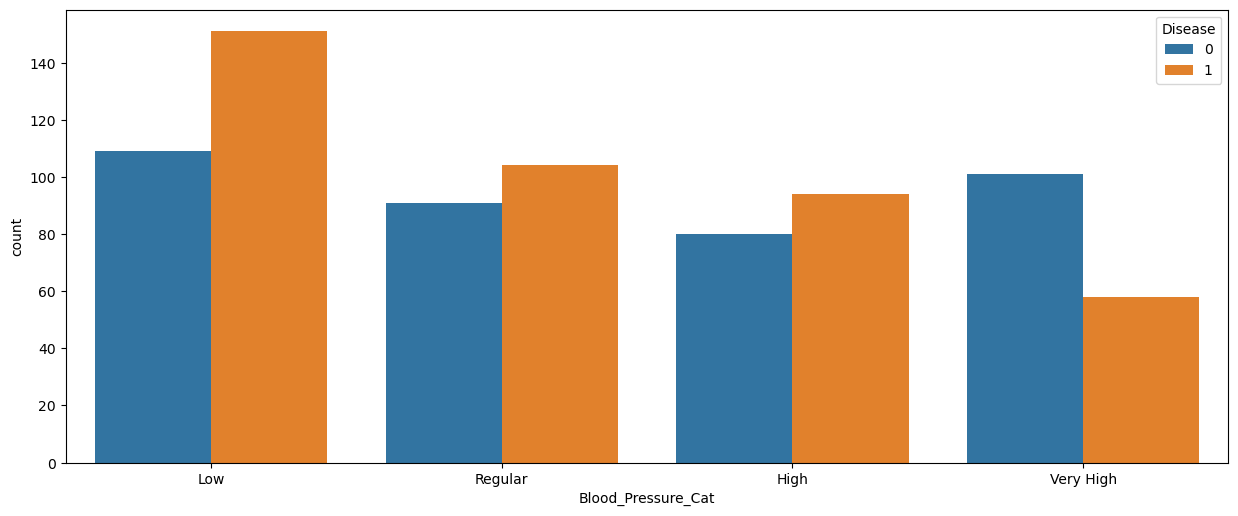

In [116]:
plt.figure(figsize=(15, 6), dpi=100)
sns.countplot(x = "Blood_Pressure_Cat", hue = "Disease", data = train_patient)
plt.show()

In [117]:
Blood_Pressure_Cat_counts = pd.DataFrame(train_patient['Blood_Pressure_Cat'].value_counts())
Blood_Pressure_Cat_counts['%'] = (train_patient["Blood_Pressure_Cat"].value_counts()/len(train_patient["Blood_Pressure_Cat"])*100).round(2)
Blood_Pressure_Cat_counts

,Blood_Pressure_Cat,%
Low,260,32.99
Regular,195,24.75
High,174,22.08
Very High,159,20.18


<Figure size 1500x600 with 0 Axes>

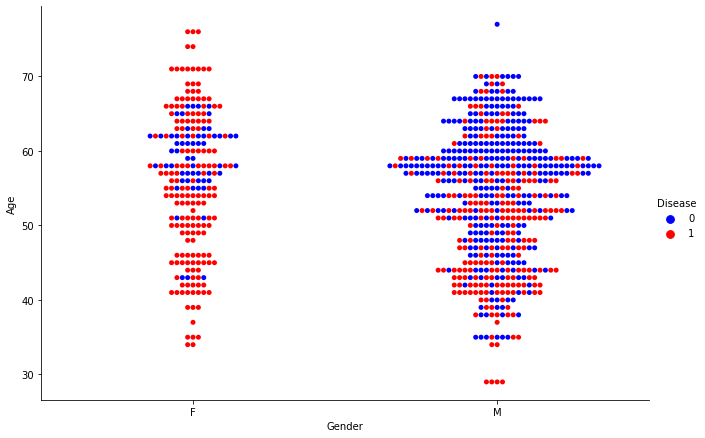

In [121]:
plt.figure(figsize=(15, 6), dpi=100)
sns.catplot(data=train_patient, y="Age", x="Gender", hue="Disease", kind="swarm", height=6, aspect=1.5,palette=sns.color_palette(['blue','red']))

<Figure size 1500x600 with 0 Axes>

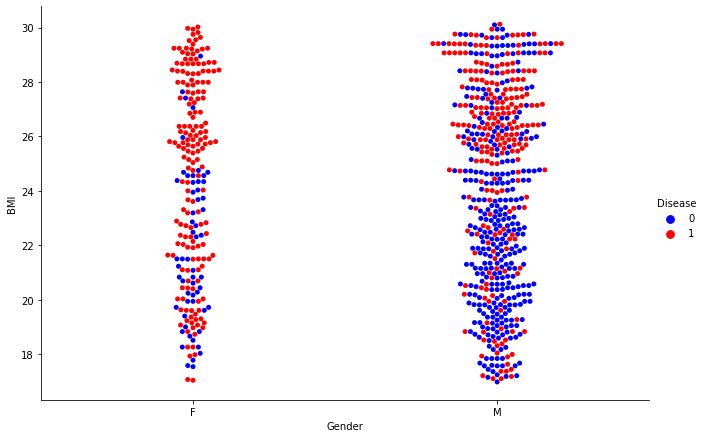

In [122]:
plt.figure(figsize=(15, 6), dpi=100)
sns.catplot(data=train_patient, y="BMI", x="Gender", hue="Disease", kind="swarm", height=6, aspect=1.5,palette=sns.color_palette(['blue','red']))

<Figure size 1500x600 with 0 Axes>

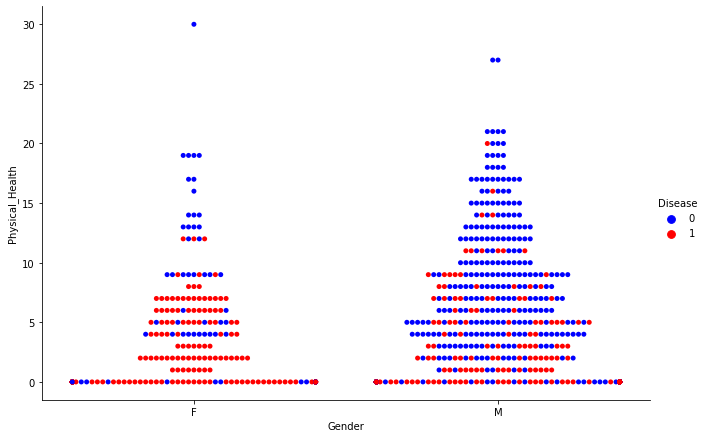

In [123]:
plt.figure(figsize=(15, 6), dpi=100)
sns.catplot(data=train_patient, y="Physical_Health", x="Gender", hue="Disease", kind="swarm", height=6, aspect=1.5,palette=sns.color_palette(['blue','red']))

<Figure size 1500x600 with 0 Axes>

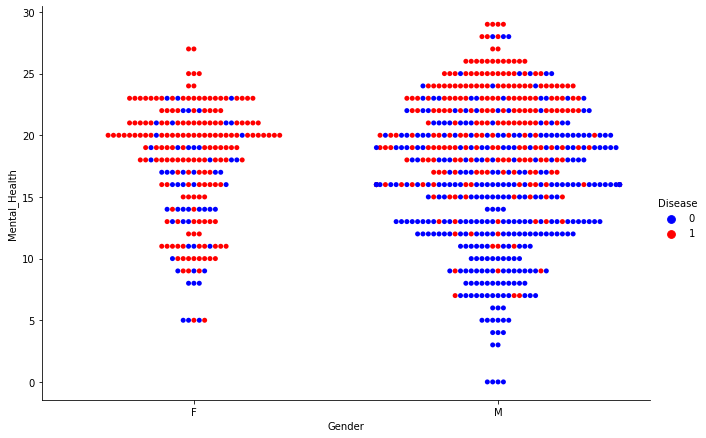

In [125]:
plt.figure(figsize=(15, 6), dpi=100)
sns.catplot(data=train_patient, y="Mental_Health", x="Gender", hue="Disease", kind="swarm", height=6, aspect=1.5,palette=sns.color_palette(['blue','red']))

In [126]:
train_patient = train_patient.drop(["Birth_Year"],axis = 1)

In [127]:
train_patient = train_patient.drop(["Name"],axis = 1)

## Transformation (?)

Since Education is a categorical variable, we had to encode it into a numerical variable so that it could be used by the models. This step also allowed us to impute the missing values which couldn't be done otherwise.

In [ ]:
x_train['Education'].replace(to_replace = 'University Complete (3 or more years)',value = 5, inplace = True)
x_train['Education'].replace(to_replace = 'University Incomplete (1 to 2 years)',value = 4, inplace = True)
x_train['Education'].replace(to_replace = 'High School Graduate',value = 3, inplace = True)
x_train['Education'].replace(to_replace = 'High School Incomplete (10th to 11th grade)',value = 2, inplace = True)
x_train['Education'].replace(to_replace = 'Elementary School (1st to 9th grade)',value = 1, inplace = True)
x_train['Education'].replace(to_replace = 'I never attended school / Other',value = 0, inplace = True)
x_train['Education'].value_counts()

In [ ]:
x_train['Drinking_Habit'].value_counts()

In [ ]:
x_train['Drinking_Habit'].replace(to_replace = 'I usually consume alcohol every day',value = 2, inplace = True)
x_train['Drinking_Habit'].replace(to_replace = 'I consider myself a social drinker',value = 1, inplace = True)
x_train['Drinking_Habit'].replace(to_replace = 'I do not consume any type of alcohol',value = 0, inplace = True)
x_train['Drinking_Habit'].value_counts()

In [ ]:
x_train['Fruit_Habit'].value_counts()

In [ ]:
x_train['Fruit_Habit'].replace(to_replace = 'More than six pieces of fruit',value = 4, inplace = True)
x_train['Fruit_Habit'].replace(to_replace = '5 to 6 pieces of fruit in average',value = 3, inplace = True)
x_train['Fruit_Habit'].replace(to_replace = '3 to 4 pieces of fruit in average',value = 2, inplace = True)
x_train['Fruit_Habit'].replace(to_replace = '1 to 2 pieces of fruit in average',value = 1, inplace = True)
x_train['Fruit_Habit'].replace(to_replace = 'Less than 1. I do not consume fruits every day.',value = 0, inplace = True)
x_train['Fruit_Habit'].value_counts()

In [ ]:
x_train['Water_Habit'].value_counts()

In [ ]:
x_train['Water_Habit'].replace(to_replace = 'Between one liter and two liters',value = 2, inplace = True)
x_train['Water_Habit'].replace(to_replace = 'More than half a liter but less than one liter',value = 1, inplace = True)
x_train['Water_Habit'].replace(to_replace = 'Less than half a liter',value = 0, inplace = True)
x_train['Water_Habit'].value_counts()

In [ ]:
x_train['Checkup'].value_counts()

In [ ]:
x_train['Checkup'].replace(to_replace = 'Less than three months',value = 3, inplace = True)
x_train['Checkup'].replace(to_replace = 'Less than 3 years but more than 1 year',value = 2, inplace = True)
x_train['Checkup'].replace(to_replace = 'More than 3 years',value = 1, inplace = True)
x_train['Checkup'].replace(to_replace = 'Not sure',value = 0, inplace = True)
x_train['Checkup'].value_counts()

In [ ]:
x_train['Diabetes'].value_counts()

In [ ]:
x_train['Diabetes'].replace(to_replace = 'Neither I nor my immediate family have diabetes.',value = 3, inplace = True)
x_train['Diabetes'].replace(to_replace = "I don't have diabetes, but I have direct family members who have diabetes.",value = 2, inplace = True)
x_train['Diabetes'].replace(to_replace = 'I have/had pregnancy diabetes or borderline diabetes',value = 1, inplace = True)
x_train['Diabetes'].replace(to_replace = 'I do have diabetes',value = 0, inplace = True)
x_train['Diabetes'].value_counts()

In [ ]:
x_train['Region'].value_counts()

In [ ]:
x_train['Region'].replace(to_replace = 'East Midlands',value = 8, inplace = True)
x_train['Region'].replace(to_replace = 'South West',value = 7, inplace = True)
x_train['Region'].replace(to_replace = 'West Midlands',value = 6, inplace = True)
x_train['Region'].replace(to_replace = 'East of England',value = 5, inplace = True)
x_train['Region'].replace(to_replace = 'South East',value = 4, inplace = True)
x_train['Region'].replace(to_replace = 'Yorkshire and the Humber',value = 3, inplace = True)
x_train['Region'].replace(to_replace = 'North West',value = 2, inplace = True)
x_train['Region'].replace(to_replace = 'North East',value = 1, inplace = True)
x_train['Region'].replace(to_replace = ['LONDON', 'London'],value = 0, inplace = True)
x_train['Region'].value_counts()

Imputing the missing values of Education with the KNNImputer.

In [111]:
imputer = KNNImputer(n_neighbors=5)

imputer.fit(train_patient['Education'].values.reshape(-1, 1))
train_patient['Education'] = imputer.transform(train_patient['Education'].values.reshape(-1, 1))

ValueError: could not convert string to float: 'High School Incomplete (10th to 11th grade)'

Checking that we no longer have missing values.

In [112]:
train_patient.isna().sum()

Name                     0
Birth_Year               0
Region                   0
Education               12
Disease                  0
Height                   0
Weight                   0
High_Cholesterol         0
Blood_Pressure           0
Mental_Health            0
Physical_Health          0
Checkup                  0
Diabetes                 0
Smoking_Habit            0
Drinking_Habit           0
Exercise                 0
Fruit_Habit              0
Water_Habit              0
Gender                   0
Age                      0
BMI                      0
Age_Cat                  0
Cholesterol_Cat          0
Mental_Health_Cat        0
Physical_Health_Cat    306
BMI_Cat                  0
Blood_Pressure_Cat       0
dtype: int64

In [ ]:
x_train

In [ ]:
x_train = x_train.drop('Name', axis = 1)

x_train

In [ ]:
x_train = pd.get_dummies(x_train, columns = ["Smoking_Habit","Exercise"], drop_first = True)

In [ ]:
x_train

### 3.x Outlier analysis

In [152]:
numeric_var = train_patient_model.select_dtypes(include=np.number)
numeric_var = numeric_var.drop(['Disease'], axis = 1)


numeric_var

,Birth_Year,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,BMI
PatientID,,,,,,,,,
1167,1965,155,67,358,120,21,2,57,27.89
1805,1969,173,88,230,142,9,0,53,29.40
1557,1974,162,68,226,122,26,0,48,25.91
1658,1958,180,66,313,125,13,8,64,20.37
1544,1968,180,58,277,125,18,2,54,17.90
...,...,...,...,...,...,...,...,...,...
1909,1972,178,61,204,144,12,4,50,19.25
1386,1980,157,61,213,120,23,0,42,24.75
1088,1860,167,48,272,140,20,17,162,17.21


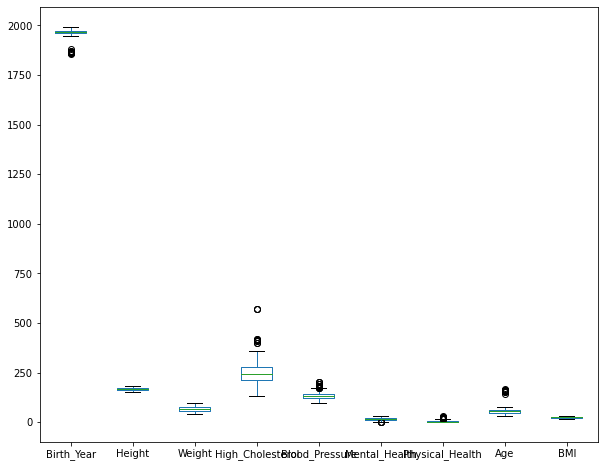

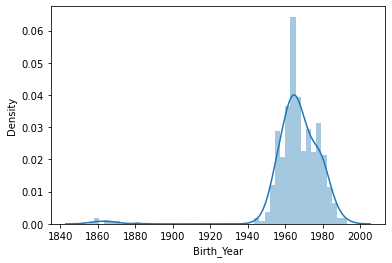

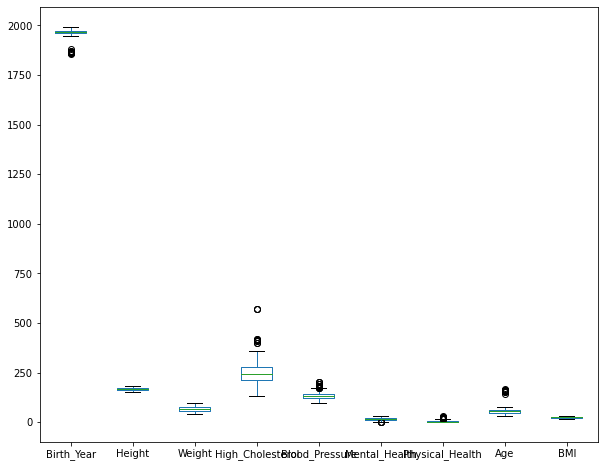

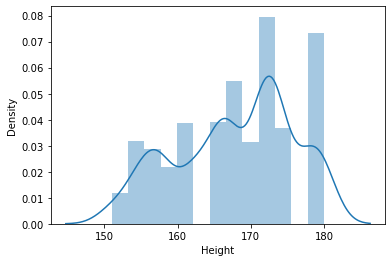

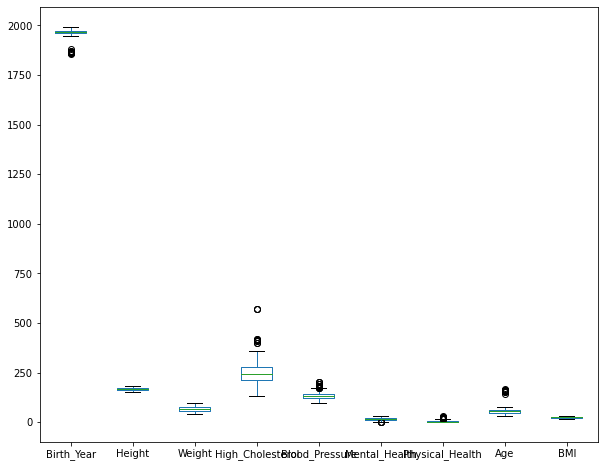

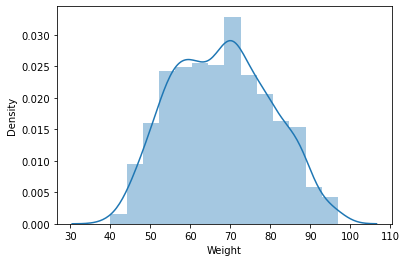

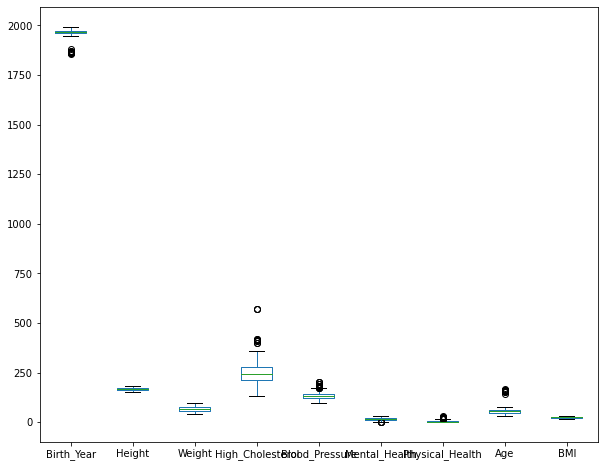

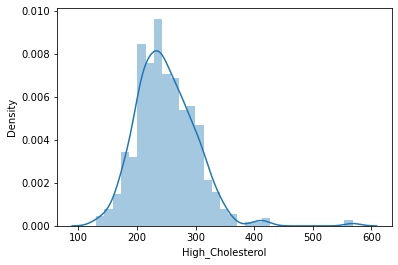

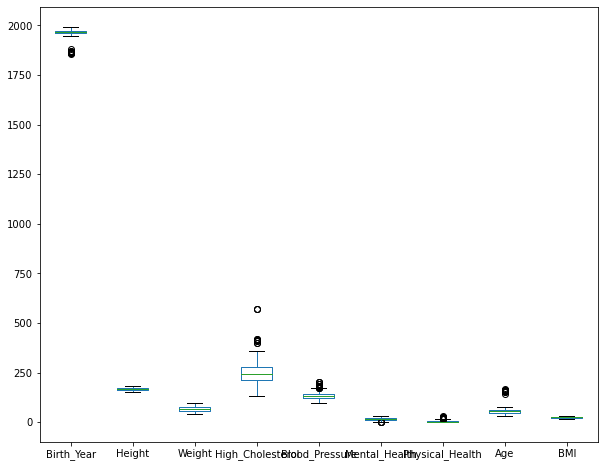

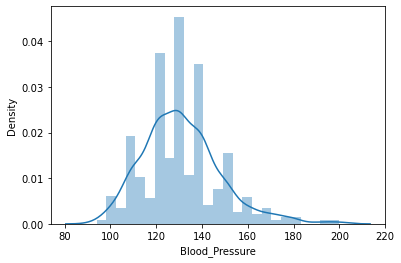

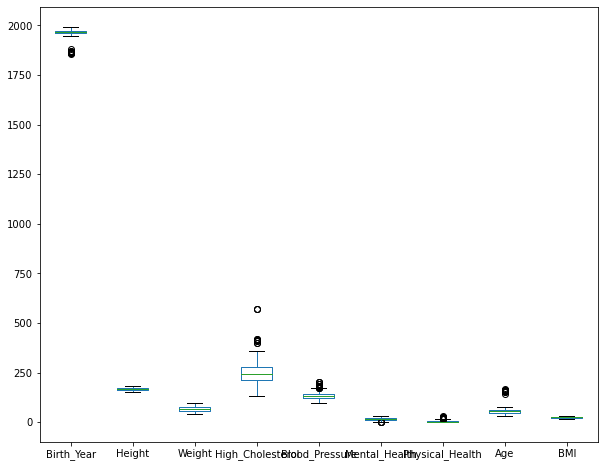

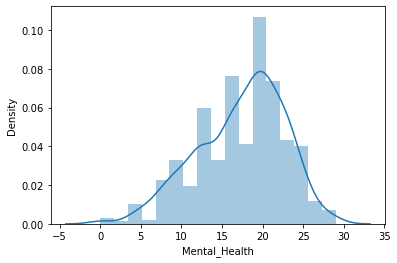

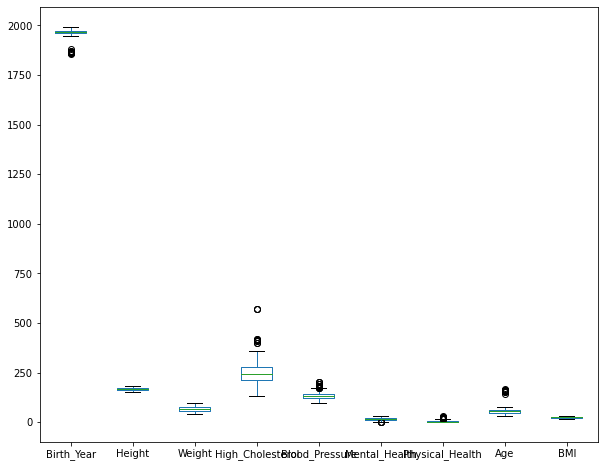

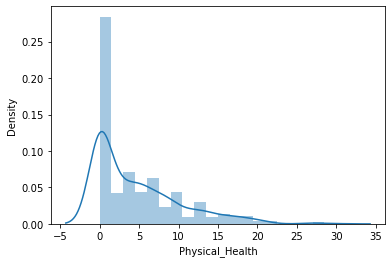

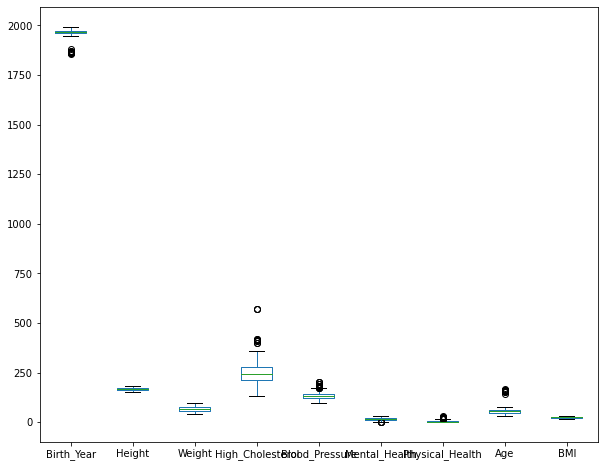

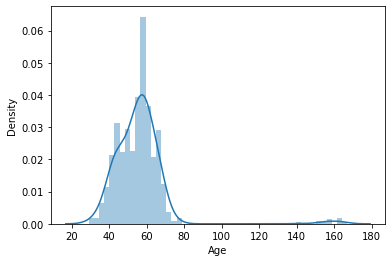

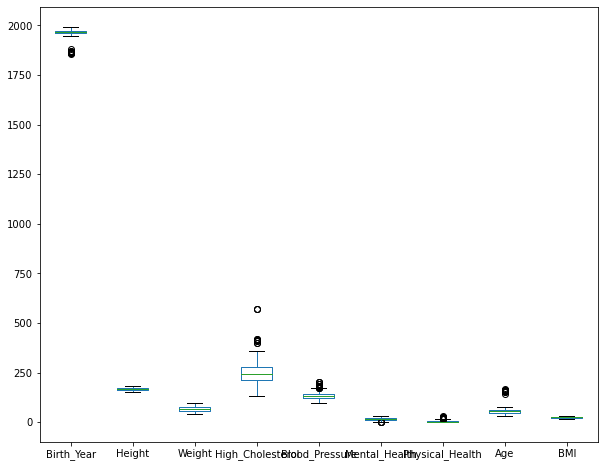

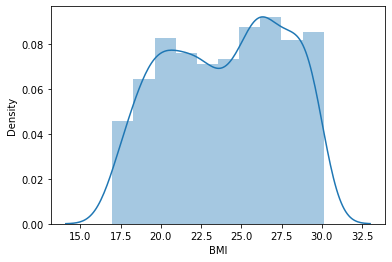

In [153]:
for col in numeric_var:
    numeric_var.plot.box(col, figsize=(10, 8))
    plt.figure()
    sns.distplot(numeric_var[col])

## Inter Quartile Range

In [154]:
iq = numeric_var.copy()
Q1 = iq.quantile(0.25)  
Q3 = iq.quantile(0.75)
IQR = Q3 - Q1
IQR

Birth_Year          13.000
Height              11.000
Weight              19.000
High_Cholesterol    66.250
Blood_Pressure      20.000
Mental_Health        8.000
Physical_Health      7.000
Age                 13.000
BMI                  6.315
dtype: float64

In [155]:
iq = iq[~((iq < (Q1 - 1.5 * IQR)) |(iq > (Q3 + 1.5 * IQR))).any(axis=1)]

In [156]:
iq

,Birth_Year,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,BMI
PatientID,,,,,,,,,
1167,1965,155,67,358,120,21,2,57,27.89
1805,1969,173,88,230,142,9,0,53,29.40
1557,1974,162,68,226,122,26,0,48,25.91
1658,1958,180,66,313,125,13,8,64,20.37
1544,1968,180,58,277,125,18,2,54,17.90
...,...,...,...,...,...,...,...,...,...
1912,1987,173,74,202,120,13,7,35,24.73
1909,1972,178,61,204,144,12,4,50,19.25
1386,1980,157,61,213,120,23,0,42,24.75


In [157]:
#PERCENTAGE OF DATA TO REMOVE
(1-(iq.shape[0] / numeric_var.shape[0]))*100

7.750000000000002

## LOCAL OUTLIER FACTOR

In [158]:
lof_df = train_patient.copy()

In [159]:
# Consider 20 neighbors 
lof = LocalOutlierFactor(n_neighbors=20)

In [160]:
lof_pred=lof.fit_predict(lof_df[numeric_var.columns])

KeyError: "['Birth_Year'] not in index"

In [161]:
outlier_index = lof_df[lof_pred == -1] # negative values are outliers
outlier_index

,Region,Education,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,...,Water_Habit,Gender,Age,BMI,Age_Cat,Cholesterol_Cat,Mental_Health_Cat,Physical_Health_Cat,BMI_Cat,Blood_Pressure_Cat
PatientID,,,,,,,,,,,,,,,,,,,,,
1464,East Midlands,High School Incomplete (10th to 11th grade),1,166,57,568,115,20,7,Not sure,...,Between one liter and two liters,F,67,20.69,"Senior [60,100]",High,Bad,Good,Healthy,Low
1175,West Midlands,University Incomplete (1 to 2 years),0,157,45,292,200,14,19,Not sure,...,More than half a liter but less than one liter,F,56,18.26,"Adult1 [40,50]",High,Medium,Medium,Underweight,Very High
1685,London,High School Graduate,0,172,58,411,150,19,19,Not sure,...,More than half a liter but less than one liter,F,63,19.61,"Senior [60,100]",High,Bad,Medium,Healthy,Very High
1101,South West,High School Incomplete (10th to 11th grade),1,178,82,130,150,23,0,Not sure,...,Between one liter and two liters,M,57,25.88,"Adult2 [50,60]",Desirable,Very bad,NaN,Overweight,Very High
1255,London,Elementary School (1st to 9th grade),1,154,55,398,140,19,5,More than 3 years,...,Between one liter and two liters,F,62,23.19,"Senior [60,100]",High,Bad,Good,Healthy,High
1986,London,Elementary School (1st to 9th grade),0,157,56,331,180,10,16,More than 3 years,...,More than half a liter but less than one liter,F,55,22.72,"Adult1 [40,50]",High,Good,Medium,Healthy,Very High
1891,East of England,I never attended school / Other,1,167,73,329,180,19,0,More than 3 years,...,More than half a liter but less than one liter,F,64,26.18,"Senior [60,100]",High,Bad,NaN,Overweight,Very High
1257,North West,University Complete (3 or more years),1,155,61,329,180,19,0,More than 3 years,...,Between one liter and two liters,F,64,25.39,"Senior [60,100]",High,Bad,NaN,Overweight,Very High
1165,London,University Complete (3 or more years),0,171,51,330,170,15,16,Not sure,...,Between one liter and two liters,M,59,17.44,"Adult2 [50,60]",High,Medium,Medium,Underweight,Very High


In [162]:
(outlier_index.shape[0] / train_patient.shape[0])*100

2.5380710659898478

## OUTLIER TREATMENT - Z-SCORE

In [166]:
z_score = train_patient_model.copy()

In [167]:
z = np.abs(stats.zscore(z_score[numeric_var.columns]))

In [168]:
z

array([[0.06772219, 1.60642354, 0.06835512, ..., 0.469859  , 0.06772219,
        1.05310242],
       [0.19181196, 0.65150706, 1.66633665, ..., 0.83711567, 0.19181196,
        1.46608376],
       [0.51622964, 0.72833942, 0.01424925, ..., 0.83711567, 0.51622964,
        0.51157722],
       ...,
       [6.88049357, 0.10113647, 1.63783815, ..., 2.28456603, 6.88049357,
        1.8678517 ],
       [0.58111318, 0.35201765, 0.59247984, ..., 0.83711567, 0.58111318,
        0.96011324],
       [0.84064733, 0.65150706, 0.17945799, ..., 1.36642435, 0.84064733,
        0.17763668]])

In [169]:
np.where(z > 3)

(array([ 18,  18,  22,  35,  61,  61,  61,  89,  93,  93, 103, 177, 194,
        198, 198, 312, 312, 312, 341, 460, 473, 481, 493, 493, 503, 511,
        542, 566, 566, 566, 585, 586, 588, 593, 593, 617, 640, 640, 648,
        648, 695, 705, 705, 710, 720, 729, 754, 757, 761, 797, 797],
       dtype=int64),
 array([0, 7, 3, 4, 0, 3, 7, 6, 0, 7, 3, 5, 5, 0, 7, 0, 3, 7, 5, 6, 3, 5,
        0, 7, 4, 6, 6, 0, 6, 7, 4, 3, 6, 0, 7, 4, 0, 7, 0, 7, 6, 0, 7, 4,
        3, 3, 6, 3, 4, 0, 7], dtype=int64))

In [170]:
# Remove the observations 3 standard deviations above the mean
z_score = z_score[(z < 3).all(axis=1)]

In [171]:
(1 - (z_score.shape[0] / train_patient.shape[0]))*100

3.0456852791878153

In [172]:
z_score

,Name,Birth_Year,Region,Education,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,...,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Gender,Age,BMI
PatientID,,,,,,,,,,,,,,,,,,,,,
1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,155,67,358,120,21,...,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,F,57,27.89
1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,173,88,230,142,9,...,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,M,53,29.40
1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,162,68,226,122,26,...,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,M,48,25.91
1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,180,66,313,125,13,...,Not sure,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,M,64,20.37
1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,180,58,277,125,18,...,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,M,54,17.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,Mr. Mike Jefferson,1987,Yorkshire and the Humber,High School Graduate,0,173,74,202,120,13,...,Not sure,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,M,35,24.73
1909,Mr. Philip Klink,1972,East Midlands,High School Incomplete (10th to 11th grade),0,178,61,204,144,12,...,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,M,50,19.25
1386,Mrs. Jackie Valencia,1980,North West,Elementary School (1st to 9th grade),1,157,61,213,120,23,...,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,F,42,24.75


### 3.x Scaling

Since variables that are measured at different scales do not contribute equally to the model fitting and model learned function and might end up creating a bias, we will deal with this potential problem by applying a Robust Scaler.

In [ ]:
x_train_num = x_train.select_dtypes(include=np.number).set_index(x_train.index)
x_train_cat = x_train.select_dtypes(exclude=np.number).set_index(x_train.index)
# DO IT for validation
x_val_num = x_val.select_dtypes(include=np.number).set_index(x_val.index)
x_val_cat = x_val.select_dtypes(exclude=np.number).set_index(x_val.index)

In [ ]:
scaler = RobustScaler().fit(x_train_num)
x_train_num_scaled = scaler.transform(x_train_num)

x_train_num_scaled = pd.DataFrame(x_train_num_scaled, columns = x_train_num.columns).set_index(x_train.index)
x_train_num_scaled.head()

In [ ]:
train

In [182]:
z_score_drop = z_score.drop (["Birth_Year","Name"],axis = 1)

In [186]:
train_patient_dummies = pd.get_dummies(z_score_drop)

In [187]:
train_patient_dummies

,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,BMI,Region_East Midlands,...,Fruit_Habit_1 to 2 pieces of fruit in average,Fruit_Habit_3 to 4 pieces of fruit in average,Fruit_Habit_5 to 6 pieces of fruit in average,Fruit_Habit_Less than 1. I do not consume fruits every day.,Fruit_Habit_More than six pieces of fruit,Water_Habit_Between one liter and two liters,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter,Gender_F,Gender_M
PatientID,,,,,,,,,,,,,,,,,,,,,
1167,1,155,67,358,120,21,2,57,27.89,0,...,0,0,0,1,0,1,0,0,1,0
1805,1,173,88,230,142,9,0,53,29.40,0,...,0,0,0,1,0,1,0,0,0,1
1557,1,162,68,226,122,26,0,48,25.91,0,...,0,0,0,1,0,0,0,1,0,1
1658,0,180,66,313,125,13,8,64,20.37,0,...,0,0,0,1,0,0,0,1,0,1
1544,1,180,58,277,125,18,2,54,17.90,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,0,173,74,202,120,13,7,35,24.73,0,...,0,0,0,1,0,1,0,0,0,1
1909,0,178,61,204,144,12,4,50,19.25,1,...,0,0,0,1,0,1,0,0,0,1
1386,1,157,61,213,120,23,0,42,24.75,0,...,0,0,0,1,0,1,0,0,1,0


In [189]:
train_patient_dummies.columns

Index(['Disease', 'Height', 'Weight', 'High_Cholesterol', 'Blood_Pressure',
       'Mental_Health', 'Physical_Health', 'Age', 'BMI',
       'Region_East Midlands', 'Region_East of England', 'Region_LONDON',
       'Region_London', 'Region_North East', 'Region_North West',
       'Region_South East', 'Region_South West', 'Region_West Midlands',
       'Region_Yorkshire and the Humber',
       'Education_Elementary School (1st to 9th grade)',
       'Education_High School Graduate',
       'Education_High School Incomplete (10th to 11th grade)',
       'Education_I never attended school / Other',
       'Education_University Complete (3 or more years)',
       'Education_University Incomplete (1 to 2 years)',
       'Checkup_Less than 3 years but more than 1 year',
       'Checkup_Less than three months', 'Checkup_More than 3 years',
       'Checkup_Not sure', 'Diabetes_I do have diabetes',
       'Diabetes_I don't have diabetes, but I have direct family members who have diabetes.',
    

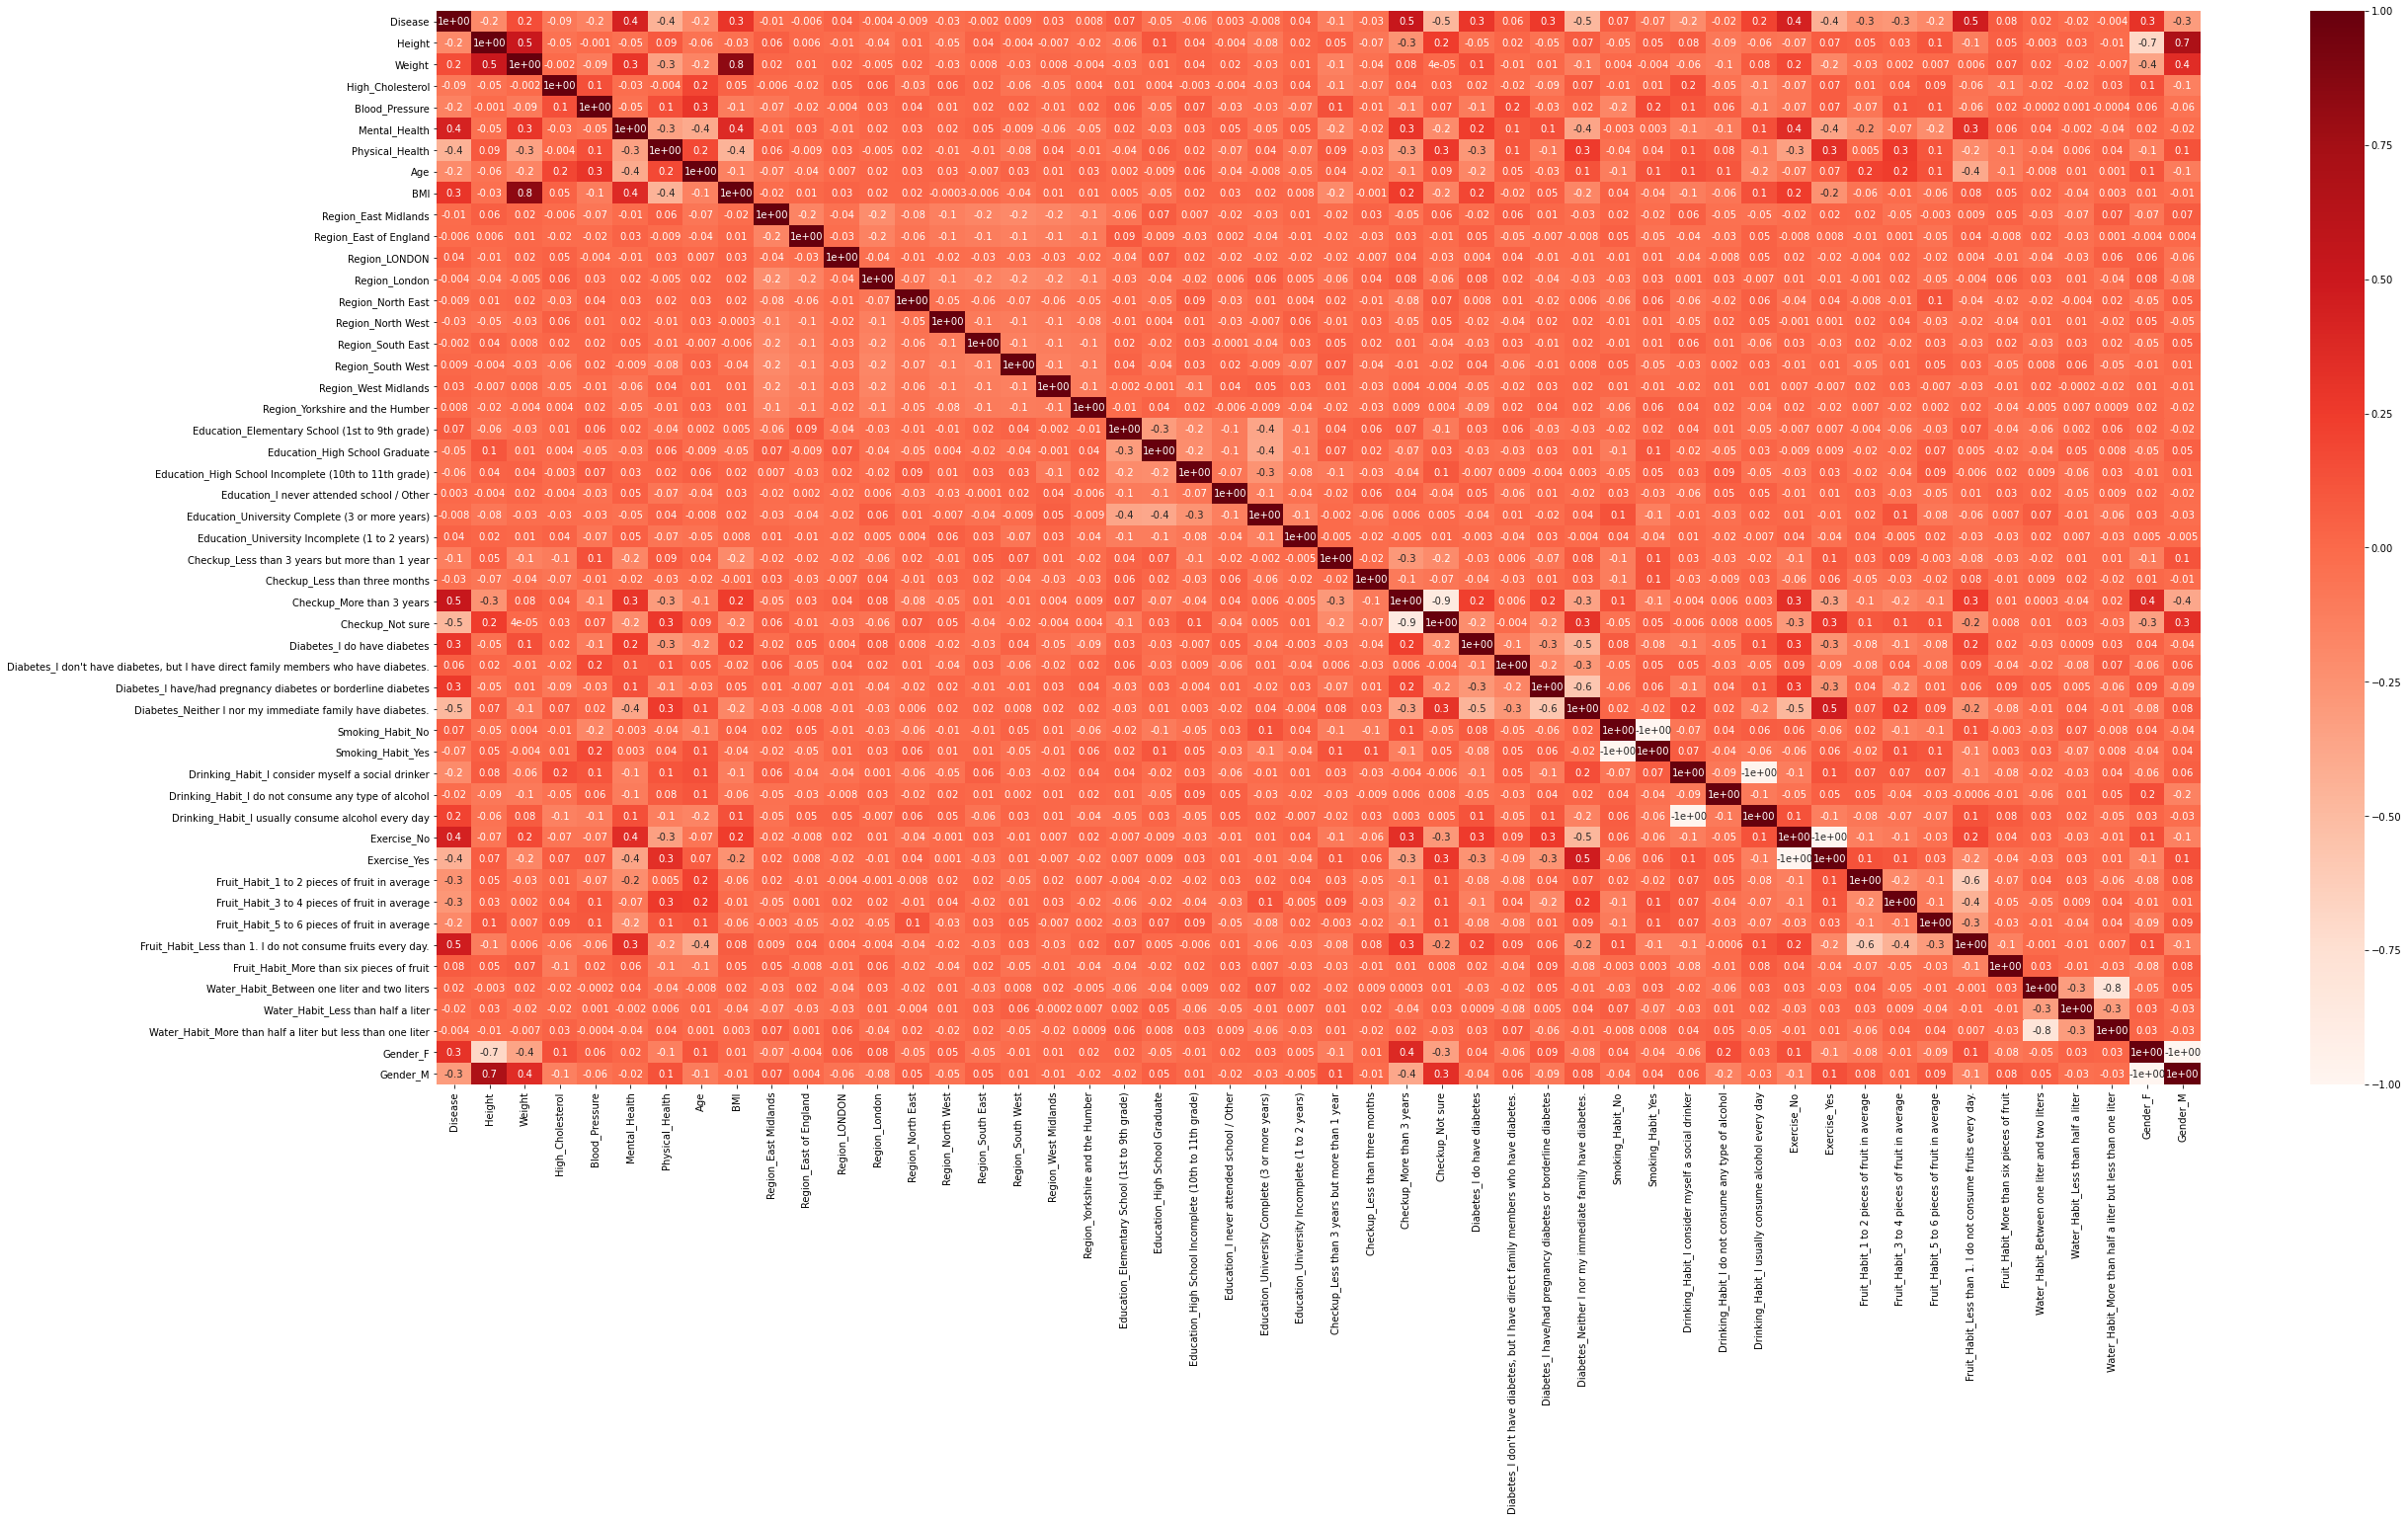

In [190]:
#Pearson correlation
cor_pearson= train_patient_dummies.corr(method ='pearson')
#Heatmap function defined
def cor_heatmap(cor):
    plt.figure(figsize=(40,20))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
#print correlation
cor_heatmap(cor_pearson)

In [191]:
#Scaling

In [192]:
#Scale the data - MinMax
from sklearn.preprocessing import MinMaxScaler

indep = train_patient_dummies.drop('Disease', axis = 1)
target = train_patient_dummies['Disease']

scale = MinMaxScaler().fit(indep)
minmax_data = scale.transform(indep)

indep = pd.DataFrame(minmax_data, columns = indep.columns)
indep.head()

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,BMI,Region_East Midlands,Region_East of England,...,Fruit_Habit_1 to 2 pieces of fruit in average,Fruit_Habit_3 to 4 pieces of fruit in average,Fruit_Habit_5 to 6 pieces of fruit in average,Fruit_Habit_Less than 1. I do not consume fruits every day.,Fruit_Habit_More than six pieces of fruit,Water_Habit_Between one liter and two liters,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter,Gender_F,Gender_M
0,0.137931,0.464286,0.850746,0.302326,0.692308,0.1,0.583333,0.830289,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.758621,0.839286,0.373134,0.558140,0.230769,0.0,0.500000,0.945205,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.379310,0.482143,0.358209,0.325581,0.884615,0.0,0.395833,0.679604,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.000000,0.446429,0.682836,0.360465,0.384615,0.4,0.729167,0.257991,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.000000,0.303571,0.548507,0.360465,0.576923,0.1,0.520833,0.070015,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### 3.x Feature Selection

Checking if any of the numerical variables is univariate (variance is equal to 0).

In [193]:
x_train_num_scaled.var()

NameError: name 'x_train_num_scaled' is not defined

In [194]:
#Pearson correlation
cor_pearson= x_train.corr(method ='pearson')
#Heatmap function defined
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
#print correlation
cor_heatmap(cor_pearson)

NameError: name 'x_train' is not defined

In [ ]:
anova = SelectKBest(f_classif, k=15)
X_anova = anova.fit_transform(x_train, x_val)
selected_features = pd.Series(anova.get_support(), index = x_train.columns)
selected_features

### Logistic Regression

In [213]:
#logistic
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=49)
embeded_lr_selector.fit(indep, target)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = indep.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
print(embeded_lr_feature)

17 selected features
['Height', 'High_Cholesterol', 'Blood_Pressure', 'Mental_Health', 'Physical_Health', 'Region_East of England', 'Region_LONDON', 'Checkup_Less than three months', 'Checkup_More than 3 years', 'Checkup_Not sure', 'Diabetes_Neither I nor my immediate family have diabetes.', 'Fruit_Habit_1 to 2 pieces of fruit in average', 'Fruit_Habit_3 to 4 pieces of fruit in average', 'Fruit_Habit_Less than 1. I do not consume fruits every day.', 'Fruit_Habit_More than six pieces of fruit', 'Gender_F', 'Gender_M']


In [214]:
#Random Forest
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=49)
embeded_rf_selector.fit(indep,target)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = indep.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

15 selected features
['Height', 'Weight', 'High_Cholesterol', 'Blood_Pressure', 'Mental_Health', 'Physical_Health', 'Age', 'BMI', 'Checkup_More than 3 years', 'Checkup_Not sure', 'Diabetes_Neither I nor my immediate family have diabetes.', 'Exercise_No', 'Exercise_Yes', 'Fruit_Habit_Less than 1. I do not consume fruits every day.', 'Gender_F']


### LGBM Classifier

In [332]:
# #LGBMC
# from sklearn.feature_selection import SelectFromModel
# from lightgbm import LGBMClassifier

# lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
#             reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

# embeded_lgb_selector = SelectFromModel(lgbc, max_features=49)
# embeded_lgb_selector.fit(indep,target)

# embeded_lgb_support = embeded_lgb_selector.get_support()
# embeded_lgb_feature = indep.loc[:,embeded_lgb_support].columns.tolist()
# print(str(len(embeded_lgb_feature)), 'selected features')
# print(embeded_lgb_feature)

LightGBMError: Do not support special JSON characters in feature name.

### Chi-Square

In [215]:
train_patient_dummies_chi = train_patient_dummies.copy()
from sklearn.feature_selection import chi2
X = indep
y = train_patient_dummies['Disease']

In [216]:
chi_scores = chi2(X,y)

In [217]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

In [218]:
chi_bool = []
for elem in p_values:
    if elem == 0:
        chi_bool.append(True)
    else:
        chi_bool.append(False)

In [219]:
chi_features = pd.Series(chi_bool, index = X.columns)

In [220]:
chi_features

Height                                                                                 False
Weight                                                                                 False
High_Cholesterol                                                                       False
Blood_Pressure                                                                         False
Mental_Health                                                                          False
Physical_Health                                                                        False
Age                                                                                    False
BMI                                                                                    False
Region_East Midlands                                                                   False
Region_East of England                                                                 False
Region_LONDON                                                         

<AxesSubplot:>

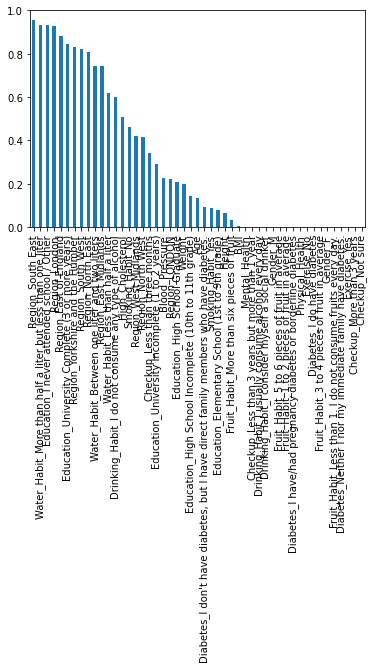

In [221]:
p_values.plot.bar()

In [222]:
p_values.tolist()

[0.9552080020842464,
 0.9336431171379084,
 0.9305107768910456,
 0.9268835760964472,
 0.879722918663938,
 0.8462757186125855,
 0.8327745811229743,
 0.8226185197697085,
 0.805509809556819,
 0.7449136717274497,
 0.7437837682893497,
 0.6180872344102282,
 0.6001364933315644,
 0.5075127358131,
 0.4629921694259559,
 0.4198486735681999,
 0.41585503177138794,
 0.3407953562677861,
 0.29232661593544457,
 0.22469206175461987,
 0.2222521585729239,
 0.2065759049905797,
 0.19930767073171995,
 0.14499362217190281,
 0.1336069343915123,
 0.09203054142099874,
 0.08908875286068002,
 0.07672600375943774,
 0.06312794163520227,
 0.03382301714399229,
 0.002581307964429572,
 0.0013563651814610862,
 0.0006990714748786106,
 5.043187796123418e-05,
 3.319453945891998e-05,
 6.817702398700566e-06,
 3.276168481586243e-07,
 9.216598818404235e-10,
 7.205148006515857e-10,
 6.119856613330063e-11,
 6.73718386588009e-12,
 1.4301927610951783e-12,
 1.427956987687662e-12,
 9.100714322201344e-13,
 2.8109996522977233e-17,
 1.00

### RFE

In [209]:
#DATA SPLIT
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(indep, target,
                                                 test_size = 0.2,
                                                 shuffle = True,
                                                 random_state = 15,
                                                 stratify = target)

X_train

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,BMI,Region_East Midlands,Region_East of England,...,Fruit_Habit_1 to 2 pieces of fruit in average,Fruit_Habit_3 to 4 pieces of fruit in average,Fruit_Habit_5 to 6 pieces of fruit in average,Fruit_Habit_Less than 1. I do not consume fruits every day.,Fruit_Habit_More than six pieces of fruit,Water_Habit_Between one liter and two liters,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter,Gender_F,Gender_M
464,1.000000,0.357143,0.287313,0.476744,0.384615,0.00,0.250000,0.140791,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
394,0.793103,0.446429,0.552239,0.674419,0.000000,0.25,0.583333,0.366819,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
549,0.551724,0.517857,0.645522,0.534884,0.769231,0.35,0.458333,0.617960,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
425,1.000000,0.857143,0.537313,0.651163,0.230769,0.15,0.604167,0.798326,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
647,0.000000,0.446429,0.720149,0.488372,0.576923,0.00,0.604167,0.910959,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.551724,0.535714,0.850746,0.302326,0.692308,0.10,0.583333,0.645358,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
380,0.931034,0.910714,0.208955,0.279070,0.769231,0.00,0.104167,0.917808,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
271,0.379310,0.553571,0.563433,0.279070,0.576923,0.20,0.812500,0.795282,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.000000,0.446429,0.682836,0.360465,0.384615,0.40,0.729167,0.257991,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [223]:
from sklearn.feature_selection import RFE
model = LogisticRegression()

In [224]:
nof_list=np.arange(1,49)   
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 6
Score with 6 features: 0.862745


In [225]:
rfe = RFE(estimator = model, n_features_to_select = 6)

In [226]:
X_rfe = rfe.fit_transform(X = indep, y = target)

In [227]:
selected_features = pd.Series(rfe.support_, index = indep.columns)
selected_features

Height                                                                                 False
Weight                                                                                 False
High_Cholesterol                                                                       False
Blood_Pressure                                                                          True
Mental_Health                                                                           True
Physical_Health                                                                         True
Age                                                                                    False
BMI                                                                                    False
Region_East Midlands                                                                   False
Region_East of England                                                                 False
Region_LONDON                                                         

### Dispertion Ratio

In [228]:
def dispersion(data):
    data = data +1 #avoid 0 division
    aritmeticMean = np.mean(data, axis =0 )
    geometricMean = np.power(np.prod(data, axis =0 ),1/data.shape[0])
    R = aritmeticMean/geometricMean
    return R

In [229]:
R = dispersion(indep)
pd.set_option('display.max_rows', None)
R.sort_values(ascending = False)

Water_Habit_More than half a liter but less than one liter                             1.061475
Water_Habit_Between one liter and two liters                                           1.061456
Drinking_Habit_I consider myself a social drinker                                      1.061211
Diabetes_Neither I nor my immediate family have diabetes.                              1.061120
Checkup_Not sure                                                                       1.060638
Drinking_Habit_I usually consume alcohol every day                                     1.060161
Checkup_More than 3 years                                                              1.059079
Exercise_Yes                                                                           1.058135
Fruit_Habit_Less than 1. I do not consume fruits every day.                            1.057300
Education_University Complete (3 or more years)                                        1.056619
Gender_F                                

<AxesSubplot:>

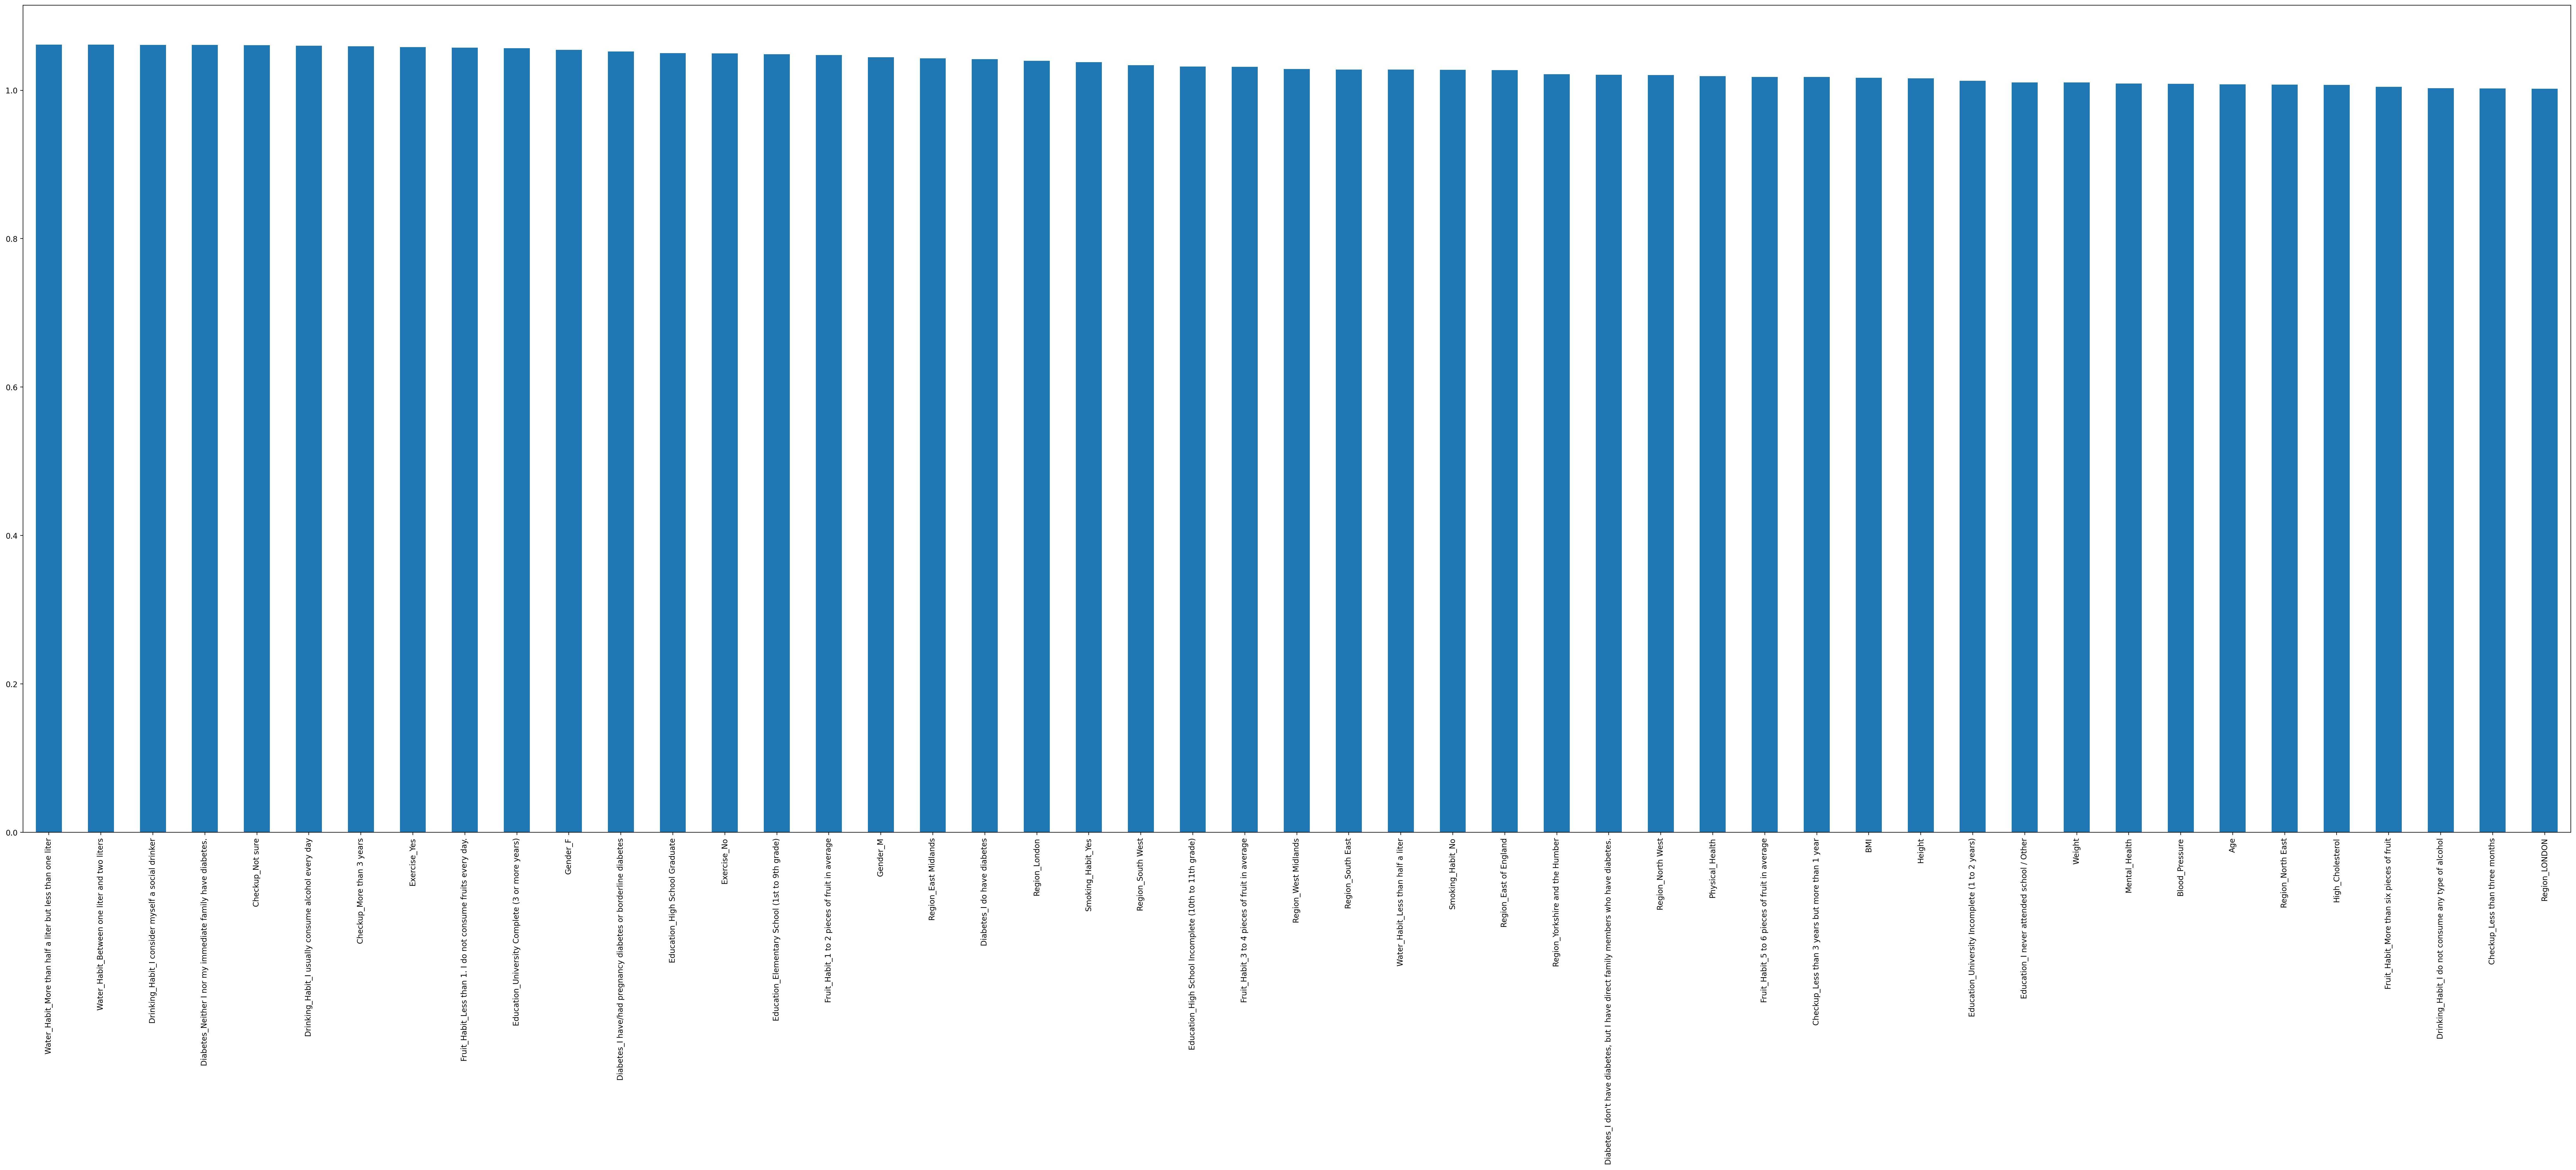

In [230]:
plt.figure(figsize=(60,20), dpi=200)
R.sort_values(ascending=False).plot(kind='bar')

In [231]:
dr_bool = []
for elem in R:
    if elem >= 1:
        dr_bool.append(True)
    else:
        dr_bool.append(False)

In [232]:
dr_features = pd.Series(dr_bool, index = X.columns)

In [233]:
dr_features

Height                                                                                 True
Weight                                                                                 True
High_Cholesterol                                                                       True
Blood_Pressure                                                                         True
Mental_Health                                                                          True
Physical_Health                                                                        True
Age                                                                                    True
BMI                                                                                    True
Region_East Midlands                                                                   True
Region_East of England                                                                 True
Region_LONDON                                                                   

### Mean Absolute Diference (MAD)

In [234]:
mad = np.sum(np.abs(indep -np.mean(indep, axis =0 )), axis = 0)/indep.shape[0]
mad.sort_values(ascending = False)

Drinking_Habit_I usually consume alcohol every day                                     0.499507
Diabetes_Neither I nor my immediate family have diabetes.                              0.499229
Drinking_Habit_I consider myself a social drinker                                      0.498763
Checkup_More than 3 years                                                              0.496491
Water_Habit_Between one liter and two liters                                           0.495309
Water_Habit_More than half a liter but less than one liter                             0.493061
Fruit_Habit_Less than 1. I do not consume fruits every day.                            0.488867
Checkup_Not sure                                                                       0.474065
Exercise_Yes                                                                           0.442981
Exercise_No                                                                            0.442981
Education_University Complete (3 or more

In [235]:
type(mad)

pandas.core.series.Series

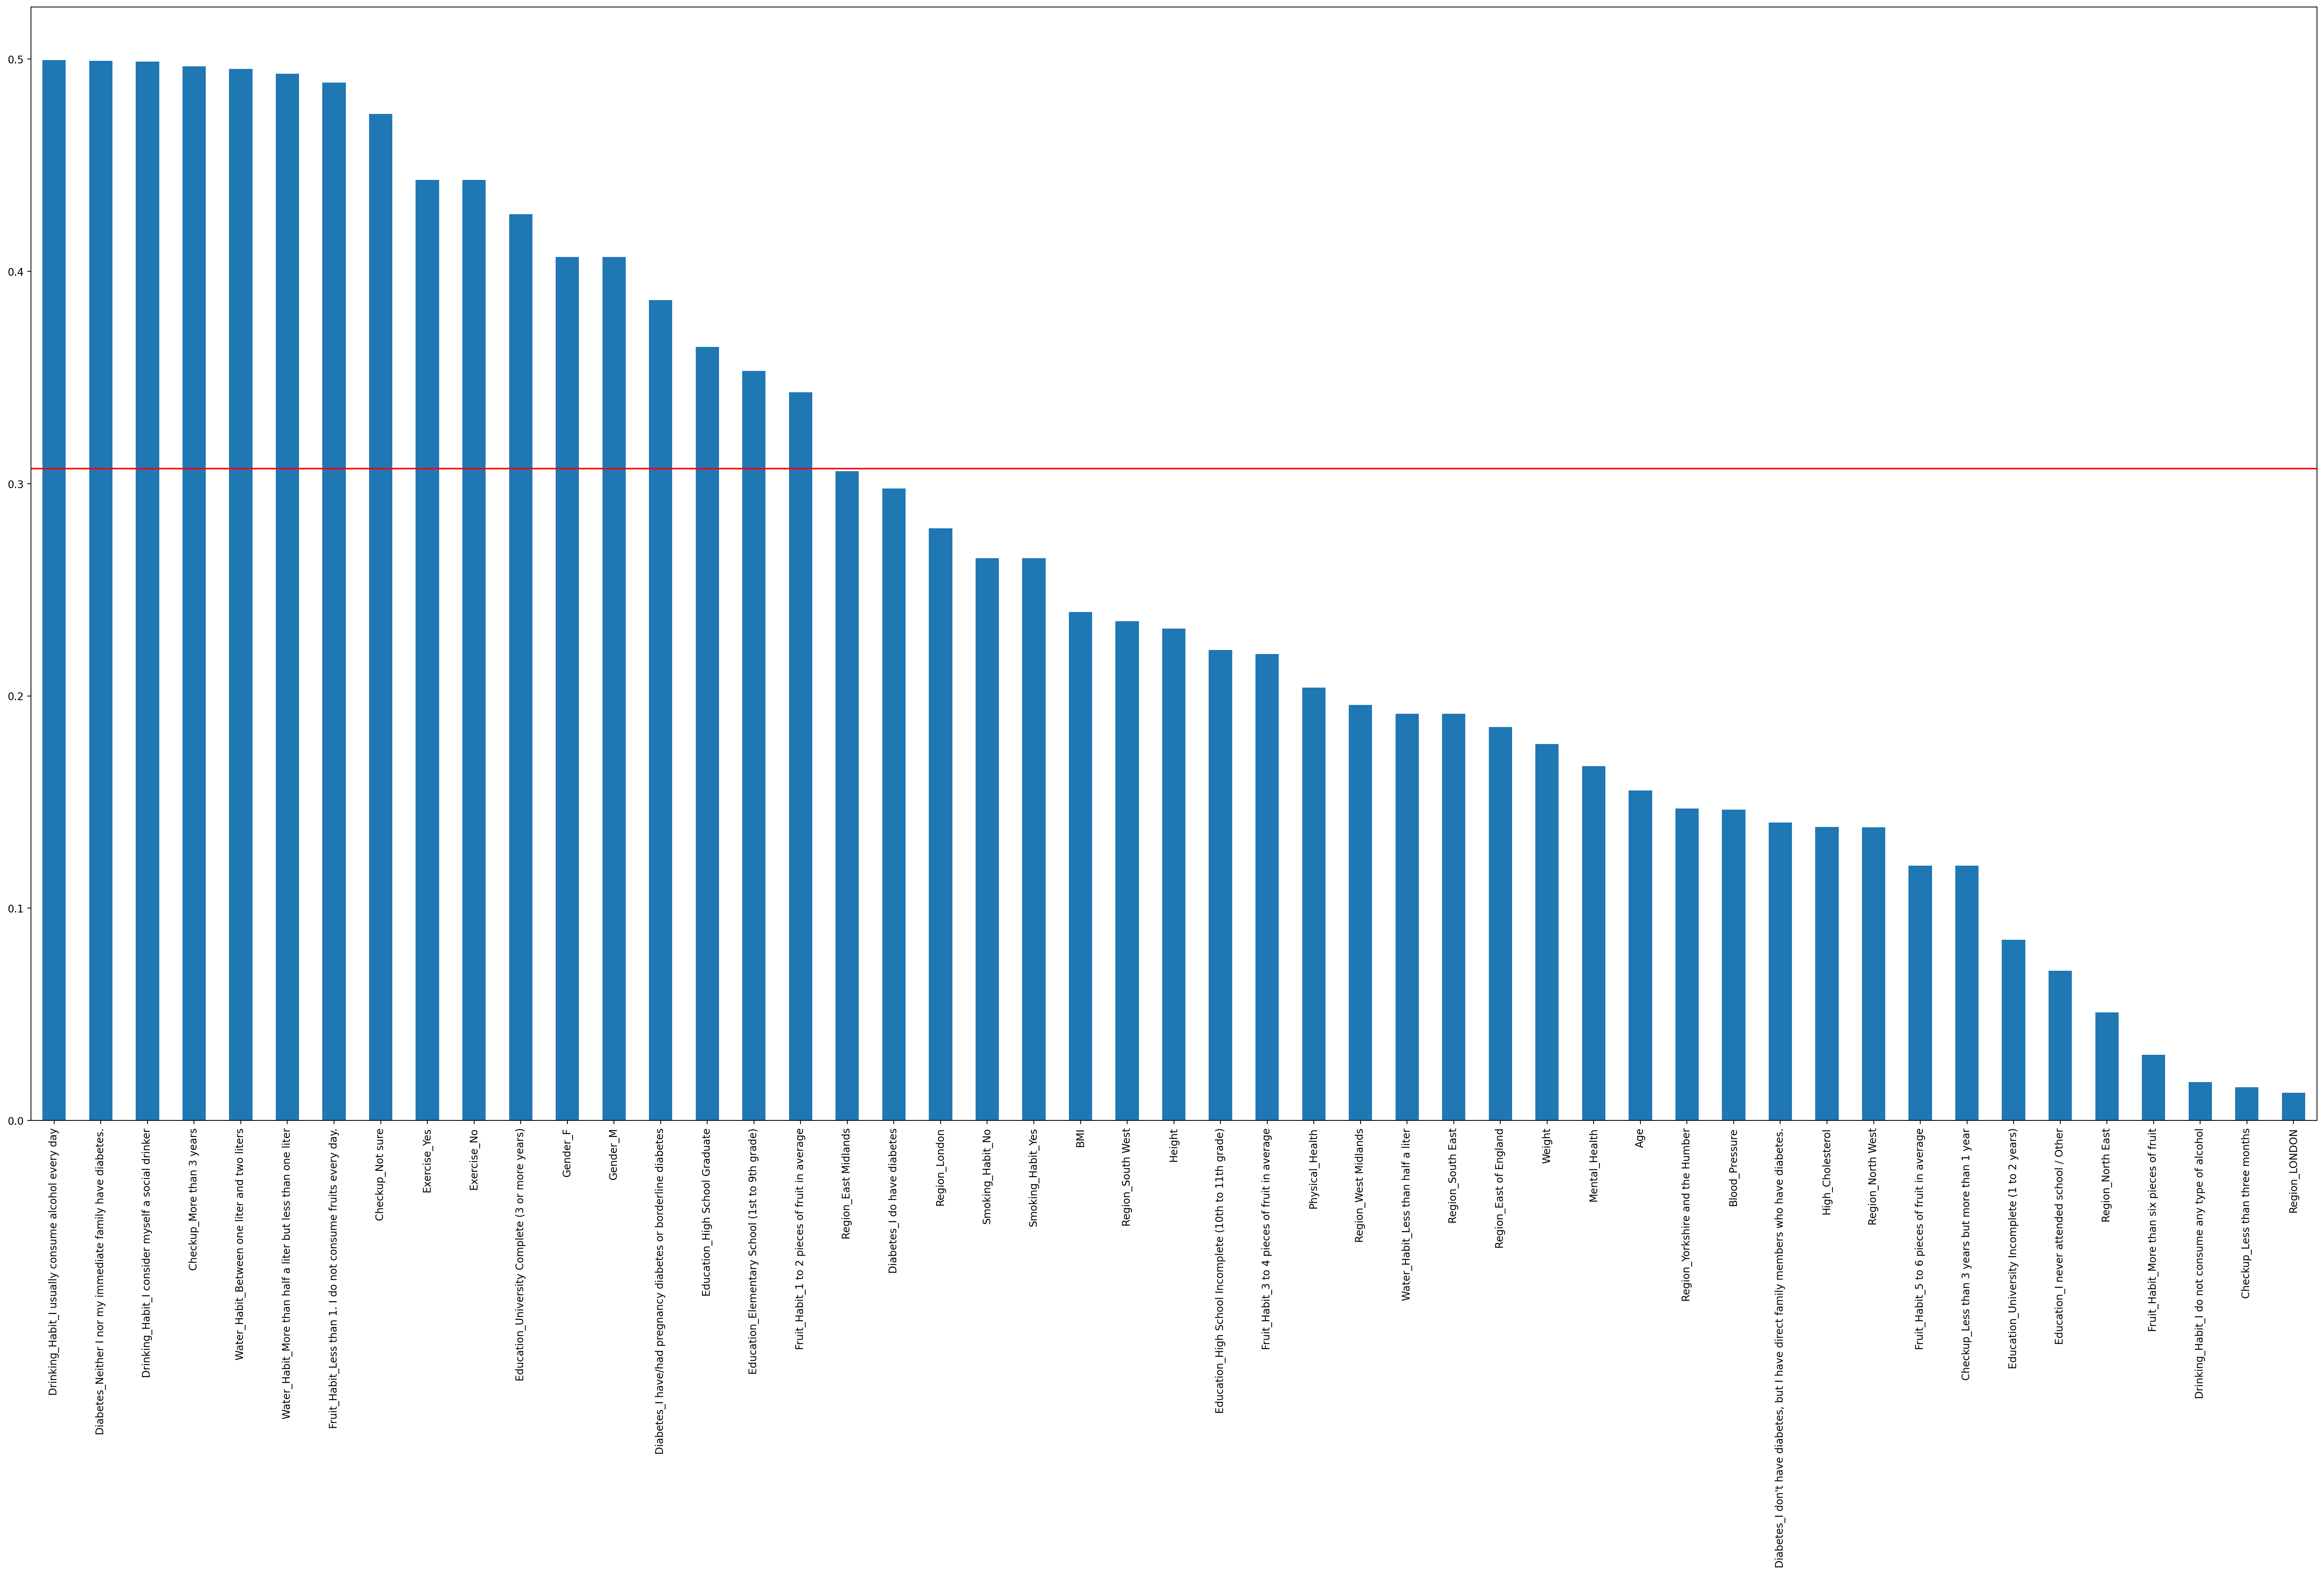

In [240]:
plt.figure(figsize=(40,20), dpi=200)
mad.sort_values(ascending=False).plot(kind='bar')
plt.axhline(y=0.307, color='red')

In [241]:
mad = mad.tolist()

In [242]:
mad_bool = []
for elem in mad:
    if elem > 0.307:
        mad_bool.append(True)
    else:
        mad_bool.append(False)

In [243]:
mad_features = pd.Series(mad_bool, index = X.columns)

In [244]:
mad_features

Height                                                                                 False
Weight                                                                                 False
High_Cholesterol                                                                       False
Blood_Pressure                                                                         False
Mental_Health                                                                          False
Physical_Health                                                                        False
Age                                                                                    False
BMI                                                                                    False
Region_East Midlands                                                                   False
Region_East of England                                                                 False
Region_LONDON                                                         

### Feature Selection Results

In [245]:
feature_selection_df = pd.DataFrame({'Feature':indep.columns,'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support,
                                     #'LightGBM':embeded_lgb_support, 
                                     'RFE':selected_features, 'Chi-Square': chi_features, 'MAD': mad_features,'DR' : dr_features})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(len(indep))

,Feature,Logistics,Random Forest,RFE,Chi-Square,MAD,DR,Total
1,Gender_F,True,True,True,False,True,True,5
2,Fruit_Habit_Less than 1. I do not consume frui...,True,True,True,False,True,True,5
3,Diabetes_Neither I nor my immediate family hav...,True,True,True,False,True,True,5
4,Physical_Health,True,True,True,False,False,True,4
5,Mental_Health,True,True,True,False,False,True,4
6,Checkup_Not sure,True,True,False,False,True,True,4
7,Checkup_More than 3 years,True,True,False,False,True,True,4
8,Blood_Pressure,True,True,True,False,False,True,4
9,High_Cholesterol,True,True,False,False,False,True,3
10,Height,True,True,False,False,False,True,3


In [247]:
fs_df3 = feature_selection_df[feature_selection_df["Total"]>3]
features_model = list(fs_df3["Feature"])
features_model

['Gender_F',
 'Fruit_Habit_Less than 1. I do not consume fruits every day.',
 'Diabetes_Neither I nor my immediate family have diabetes.',
 'Physical_Health',
 'Mental_Health',
 'Checkup_Not sure',
 'Checkup_More than 3 years',
 'Blood_Pressure']

In [248]:
# train_dropped_without_out = train_patient_dummies[['Height',
#  'Fruit_Habit_Less than 1. I do not consume fruits every day.',
#  'Diabetes_Neither I nor my immediate family have diabetes.',
#  'Checkup_Not sure',
#  'BMI',
#  'Physical_Health',
#  'Mental_Health',
#  'High_Cholesterol',
#  'Gender_M',
#  'Gender_F',
#  'Exercise_No',
#  'Checkup_More than 3 years',
#  'Blood_Pressure']]

In [249]:
train_dropped = train_patient_dummies[['Gender_F',
 'Fruit_Habit_Less than 1. I do not consume fruits every day.',
 'Diabetes_Neither I nor my immediate family have diabetes.',
 'Physical_Health',
 'Mental_Health',
 'Checkup_Not sure',
 'Checkup_More than 3 years',
 'Blood_Pressure']]

###  Split

In [250]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_dropped, target,
                                                 test_size = 0.2,
                                                 shuffle = True,
                                                 random_state = 15,
                                                 stratify = target)



## 4. Modelling

###  Logistic Regression

In [254]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [255]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [256]:
y_pred = log_model.predict(X_val)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [257]:
pred_prob = log_model.predict_proba(X_val)
pred_prob

array([[0.29068906, 0.70931094],
       [0.91344483, 0.08655517],
       [0.40146952, 0.59853048],
       [0.91344483, 0.08655517],
       [0.01063793, 0.98936207],
       [0.97534259, 0.02465741],
       [0.98171693, 0.01828307],
       [0.04046656, 0.95953344],
       [0.9461784 , 0.0538216 ],
       [0.86317962, 0.13682038],
       [0.54040888, 0.45959112],
       [0.11823178, 0.88176822],
       [0.8496484 , 0.1503516 ],
       [0.1847367 , 0.8152633 ],
       [0.06065609, 0.93934391],
       [0.03828759, 0.96171241],
       [0.89075303, 0.10924697],
       [0.05932753, 0.94067247],
       [0.57428036, 0.42571964],
       [0.44057788, 0.55942212],
       [0.93370057, 0.06629943],
       [0.91232118, 0.08767882],
       [0.93317323, 0.06682677],
       [0.3469693 , 0.6530307 ],
       [0.05530797, 0.94469203],
       [0.05316405, 0.94683595],
       [0.48812771, 0.51187229],
       [0.02885318, 0.97114682],
       [0.53807163, 0.46192837],
       [0.14292142, 0.85707858],
       [0.

In [258]:
log_model.coef_

array([[ 1.24227347,  1.58618104, -1.51638225, -0.15015659,  0.09755599,
        -0.55203461,  0.88699994, -0.01996883]])

In [259]:
from sklearn.metrics import classification_report, confusion_matrix

In [260]:
labels_train = log_model.predict(X_train)
labels_val = log_model.predict(X_val)

In [261]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [262]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       289
           1       0.86      0.87      0.86       322

    accuracy                           0.85       611
   macro avg       0.85      0.85      0.85       611
weighted avg       0.85      0.85      0.85       611

[[242  47]
 [ 42 280]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

Text(0.5, 1.0, 'Logistic Regression \n Confusion Matrix')

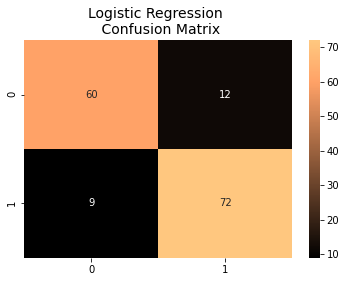

In [263]:
from sklearn.metrics import confusion_matrix
log_reg_cf = confusion_matrix(y_val, y_pred)

sns.heatmap(log_reg_cf, annot=True, cmap=plt.cm.copper)
plt.title("Logistic Regression \n Confusion Matrix", fontsize=14)

###  Bayes

In [264]:
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB(var_smoothing=0.0001)

In [265]:
modelNB.fit(X = X_train, y = y_train)

GaussianNB(var_smoothing=0.0001)

In [266]:
labels_train = modelNB.predict(X_train)
labels_val = modelNB.predict(X_val)

In [267]:
modelNB.predict_proba(X_val)

array([[8.04300324e-02, 9.19569968e-01],
       [9.97408601e-01, 2.59139900e-03],
       [6.88255740e-01, 3.11744260e-01],
       [9.97408601e-01, 2.59139900e-03],
       [2.85170732e-04, 9.99714829e-01],
       [9.99485384e-01, 5.14616287e-04],
       [9.99521106e-01, 4.78894025e-04],
       [2.31305580e-03, 9.97686944e-01],
       [9.99914469e-01, 8.55312440e-05],
       [9.74953365e-01, 2.50466348e-02],
       [8.53988621e-01, 1.46011379e-01],
       [7.90458857e-03, 9.92095411e-01],
       [9.97947988e-01, 2.05201163e-03],
       [3.95350043e-02, 9.60464996e-01],
       [2.33204227e-03, 9.97667958e-01],
       [2.17067464e-03, 9.97829325e-01],
       [9.89838577e-01, 1.01614231e-02],
       [3.79246059e-03, 9.96207539e-01],
       [3.55355510e-01, 6.44644490e-01],
       [7.49997165e-01, 2.50002835e-01],
       [9.96141410e-01, 3.85858979e-03],
       [9.98736023e-01, 1.26397712e-03],
       [9.98424008e-01, 1.57599205e-03],
       [5.42013180e-02, 9.45798682e-01],
       [3.977842

In [268]:
modelNB.score(X_train, y_train)

0.8527004909983633

In [269]:
modelNB.class_prior_

array([0.47299509, 0.52700491])

In [270]:
modelNB.class_count_

array([289., 322.])

In [271]:
modelNB.theta_

array([[  0.1349481 ,   0.33910035,   0.74394464,   6.50865052,
         15.23529412,   0.62975779,   0.26297578, 133.66435986],
       [  0.39751553,   0.79813665,   0.26708075,   2.12111801,
         19.47826087,   0.16149068,   0.79503106, 128.21428571]])

In [272]:
# modelNB.var_

In [273]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       289
           1       0.87      0.85      0.86       322

    accuracy                           0.85       611
   macro avg       0.85      0.85      0.85       611
weighted avg       0.85      0.85      0.85       611

[[248  41]
 [ 49 273]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

Text(0.5, 1.0, 'Logistic Regression \n Naive Bayes')

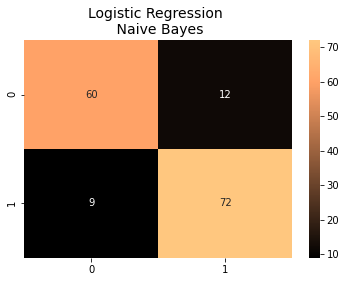

In [274]:
naive_bayescf = confusion_matrix(y_val, y_pred)

sns.heatmap(naive_bayescf, annot=True, cmap=plt.cm.copper)
plt.title("Logistic Regression \n Naive Bayes", fontsize=14)

###  KNN

In [275]:
from sklearn.neighbors import KNeighborsClassifier

In [276]:
modelKNN = KNeighborsClassifier()

In [277]:
modelKNN.fit(X = X_train, y = y_train)

KNeighborsClassifier()

In [278]:
labels_train = modelKNN.predict(X_train)
labels_val = modelKNN.predict(X_val)
labels_val

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [279]:
modelKNN.predict_proba(X_val)

array([[0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.4, 0.6],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0. , 1. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.4, 0.6],
       [0. ,

In [280]:
print(modelKNN.score(X_train, y_train))
print(modelKNN.score(X_val, y_val))

0.8788870703764321
0.7581699346405228


In [281]:
modelKNN.kneighbors(X = X_val)

(array([[ 0.        ,  2.44948974,  2.44948974,  3.60555128,  3.60555128],
        [ 0.        ,  2.23606798,  2.44948974,  3.74165739,  3.74165739],
        [ 0.        ,  3.31662479,  3.46410162,  3.87298335,  3.87298335],
        [ 0.        ,  2.23606798,  2.44948974,  3.74165739,  3.74165739],
        [ 0.        ,  1.41421356,  1.41421356,  1.41421356,  2.82842712],
        [ 0.        ,  2.23606798,  2.64575131,  2.64575131,  2.64575131],
        [ 0.        ,  0.        ,  0.        ,  6.63324958,  6.63324958],
        [ 0.        ,  0.        ,  2.23606798,  2.23606798,  2.23606798],
        [ 0.        ,  0.        ,  2.        ,  3.        ,  5.09901951],
        [ 0.        ,  0.        ,  2.64575131,  2.64575131,  2.64575131],
        [ 2.44948974,  2.64575131,  2.64575131,  2.64575131,  2.82842712],
        [ 0.        ,  0.        ,  1.        ,  1.        ,  1.73205081],
        [ 0.        ,  5.83095189,  6.08276253,  6.08276253,  6.92820323],
        [ 0.        ,  0.

In [282]:
modelKNN4 = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)

In [286]:
labels_train = modelKNN4.predict(X_train)
labels_val = modelKNN4.predict(X_val)

In [287]:
modelKNN4.predict_proba(X_val)

array([[0.25, 0.75],
       [0.75, 0.25],
       [0.  , 1.  ],
       [0.75, 0.25],
       [0.  , 1.  ],
       [0.5 , 0.5 ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.75, 0.25],
       [0.  , 1.  ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.75, 0.25],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.5 , 0.5 ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.25, 0.75],
       [0.75, 0.25],
       [0.  , 1.  ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.75, 0.25],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.  , 1.  ],
       [0.5 , 0.5 ],
       [0.75, 0.25],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.5 ,

In [284]:
print(modelKNN4.score(X_train, y_train))
print(modelKNN4.score(X_val, y_val))

0.9018003273322422
0.8366013071895425


In [285]:
import numpy as np
numberK_list=np.arange(2,90)
high_score=0
nof=0           
score_list_train =[]
score_list_val =[]
for n in numberK_list:
    model = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    score_train = model.score(X_train, y_train)
    score_val = model.score(X_val, y_val)
    score_list_train.append(score_train)
    score_list_val.append(score_val)
    
    if(score_val>high_score):
        high_score = score_val
        nof = numberK_list[n-1]
print("Best number of neighbors: %d" %nof)
print("Mean accuracy in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
print("Mean accuracy in validation with %d neighbors: %f" % (nof, high_score))

Best number of neighbors: 4
Mean accuracy in train with 4 neighbors: 0.878887
Mean accuracy in validation with 4 neighbors: 0.921569


In [313]:
modelKNNT = KNeighborsClassifier(algorithm='kd_tree').fit(X_train, y_train)

In [314]:
labels_train = modelKNNT.predict(X_train)
labels_val = modelKNNT.predict(X_val)

In [315]:
modelKNNT.score(X_train, y_train)
modelKNNT.score(X_val, y_val)

0.8125

In [316]:
modelKNNM = KNeighborsClassifier(metric = 'manhattan').fit(X = X_train, y = y_train)

In [317]:
labels_train = modelKNNM.predict(X_train)
labels_val = modelKNNM.predict(X_val)

In [318]:
print(modelKNNM.score(X_train, y_train))
print(modelKNNM.score(X_val, y_val))

0.9125
0.8375


In [319]:
modelKNNW= KNeighborsClassifier(weights='distance').fit(X = X_train, y = y_train)

In [320]:
labels_train = modelKNNW.predict(X_train)
labels_val = modelKNNW.predict(X_val)

In [321]:
modelKNNW.predict_proba(X_val)

array([[0.19356699, 0.80643301],
       [0.10633842, 0.89366158],
       [0.097209  , 0.902791  ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.36810605, 0.63189395],
       [0.        , 1.        ],
       [0.48874358, 0.51125642],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.06435775, 0.93564225],
       [1.        , 0.        ],
       [0.73233472, 0.26766528],
       [0.        , 1.        ],
       [0.38150989, 0.61849011],
       [1.        , 0.        ],
       [0.70392875, 0.29607125],
       [1.        , 0.        ],
       [0.09943036, 0.90056964],
       [0.73715045, 0.26284955],
       [0.76992965, 0.23007035],
       [1.        , 0.        ],
       [0.08139741, 0.91860259],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.17745504, 0.82254496],
       [0.86972078, 0.13027922],
       [0.38083764, 0.61916236],
       [0.1958404 , 0.8041596 ],
       [0.

In [322]:
print(modelKNNW.score(X_train, y_train))
print(modelKNNW.score(X_val, y_val))

1.0
0.875


In [288]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       289
           1       1.00      0.82      0.90       322

    accuracy                           0.90       611
   macro avg       0.91      0.91      0.90       611
weighted avg       0.92      0.90      0.90       611

[[288   1]
 [ 59 263]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  

Text(0.5, 1.0, 'Logistic Regression \n KNN')

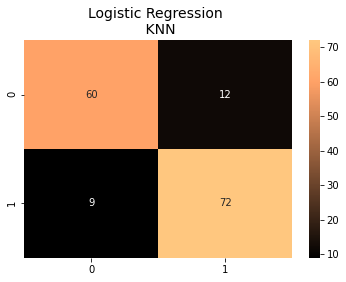

In [289]:
knn_cf = confusion_matrix(y_val, y_pred)

sns.heatmap(knn_cf, annot=True, cmap=plt.cm.copper)
plt.title("Logistic Regression \n KNN", fontsize=14)

### Decision Trees

In [ ]:
#gonçalo 

### Support Vector Machine

In [ ]:
#daniel

### Neural Network

In [ ]:
# manuel e filipe

## 5. Assessment

## 6. Deploy

In [ ]:
# daniel